## Setup


In [1]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as clrs
import pandas as pd
import datetime

figDPI = 100

# Color definitions
ClrS = (0.74, 0.00, 0.00)
ClrN = (0.20, 0.56, 1.00)

Clr = [
    (0.00, 0.00, 0.00),
    (0.31, 0.24, 0.00),
    (0.43, 0.16, 0.49),
    (0.32, 0.70, 0.30),
    (0.45, 0.70, 0.90),
    (1.00, 0.82, 0.67),
]

colorsMsk = [(0.65, 0.5, 0.35), (0.60, 0.60, 0.4), (0.42, 0.5, 0.56), (0.5, 0.5, 0.5)]

# Area limit for modern data
ALim = 10

# Marker Size
MZ = 10

# Font size
FZ = 30

# Font Size

font = {"family": "sans-serif", "weight": "normal", "size": 30}

plt.rc("font", **font)

data_folder = "/home/amunozj/git_repos/Bfly_diagram/data/"

In [2]:
DATA_FOLDER = "/home/amunozj/git_repos/butterfly_diagram_data/data/"
OUTPUT_FOLDER = "/home/amunozj/git_repos/butterfly_diagram_data/data/output_data/"
FIGURE_FOLDER = "/home/amunozj/git_repos/butterfly_diagram_data/figures/"

# Reading group numbers

In [3]:
GN = {}

# --------------------------------------------------------------------------------------------
# Svalgaard

GN["Svalgaard"] = pd.read_table(
    data_folder + "input_data/GNbb2_y.txt",
    delimiter=r"\s+",
    engine="python"
)
GN["Svalgaard"]

,Year,GN,GNE
0,1610.5,2.64,0.92
1,1611.5,5.28,1.85
2,1612.5,10.56,3.70
3,1613.5,7.92,2.77
4,1614.5,7.04,2.46
...,...,...,...
401,2011.5,4.80,0.18
402,2012.5,5.09,0.19
403,2013.5,5.78,0.22
404,2014.5,6.63,0.25


In [4]:
GN["Usoskin"] = pd.read_table(
    data_folder + "input_data/GNiu_y2.txt",
    delimiter=r"\s+",
    engine="python"
)
GN["Usoskin"]

,Year,GN,GNE,NOBS,OFS
0,1749.5,7.017,0.797,55,-0.062
1,1750.5,6.043,0.878,30,-0.049
2,1751.5,4.500,1.558,7,0.142
3,1752.5,2.970,0.453,48,0.039
4,1753.5,3.227,0.823,9,-0.006
...,...,...,...,...,...
242,1991.5,12.085,0.058,365,0.000
243,1992.5,7.939,0.043,366,0.000
244,1993.5,4.452,0.023,365,0.000
245,1994.5,2.952,0.023,365,0.000


### Define funcions for bad lines


In [5]:
def bad_line_printer(x):
    print(x)
    return x

def bad_line_ignore(x):
    return x

### Add Historical observations


In [6]:
Columns_to_keep = [
        "LocalDate",
        "UTCDate",
        "DateUncertainty",
        "FractionalYear",
        "Site",
        "GeoLatDeg",
        "GeoLatMin",
        "GeoLonDeg",
        "GeoLonMin",
        "Ordinal",
        "Year",
        "Month",
        "Day",
        "Hour",
        "Minute",
        "Lat",
        "CarringtonLon",
        "LonFromDiskCenter",
        "DegreesFromDiskCenter",
        "PlacementUncertainty",
        "OrientationUncertainty",        
        "RawGroupArea",
        "RawSpotArea",
        "RawSpotAreaUmbral",
        "SpotID",
        "GroupID",
        "Source",
        "Cycle",
        "CycleName",
        "Origin",
        "Reference"
    ]

In [7]:
Bfly = {}

Bfly["Harriot"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1610_1613_Harriot_11207_2020_1604_MOESM2_ESM.txt",
    delimiter=r"\t+",
    skiprows=32,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

Bfly["Harriot"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1610_1613_Harriot_11207_2020_1604_MOESM3_ESM.txt",
    delimiter=r"\t+",
    skiprows=30,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Harriot"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Harriot"]["DF"]["MM"] = Method1["MM"]
Bfly["Harriot"]["DF"]["DD"] = Method1["DD"]
Bfly["Harriot"]["DF"]["HH"] = Method1["HH"]
Bfly["Harriot"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Harriot"]["DF"] = Bfly["Harriot"]["DF"].loc[np.isfinite(Bfly["Harriot"]["DF"]["LLL.LL"]), :]


Bfly["Harriot"]["DF"]["Ordinal"] = Bfly["Harriot"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Harriot"]["DF"]["FractionalYear"] = Bfly["Harriot"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Harriot"]["DF"]["tmpHH"] = Bfly["Harriot"]["DF"]["HH"]
Bfly["Harriot"]["DF"].loc[np.isnan(Bfly["Harriot"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Harriot"]["DF"]["tmpMI"] = Bfly["Harriot"]["DF"]["MI"]
Bfly["Harriot"]["DF"].loc[np.isnan(Bfly["Harriot"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Harriot"]["DF"]["UTCDate"] = Bfly["Harriot"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Harriot"]["DF"]["LocalDate"] = ''
Bfly["Harriot"]["DF"]["DateUncertainty"] = np.nan
Bfly["Harriot"]["DF"]["Site"] = Bfly["Harriot"]["DF"]["Place"]
Bfly["Harriot"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Harriot"]["DF"]["GeoLatMin"] = np.nan
Bfly["Harriot"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Harriot"]["DF"]["GeoLonMin"] = np.nan
Bfly["Harriot"]["DF"]["Year"] = Bfly["Harriot"]["DF"]["YYYY"]
Bfly["Harriot"]["DF"]["Month"] = Bfly["Harriot"]["DF"]["MM"]
Bfly["Harriot"]["DF"]["Day"] = Bfly["Harriot"]["DF"]["DD"]  
Bfly["Harriot"]["DF"]["Hour"] = Bfly["Harriot"]["DF"]["HH"].astype(int)
Bfly["Harriot"]["DF"]["Minute"] = Bfly["Harriot"]["DF"]["MI"].astype(int)
Bfly["Harriot"]["DF"]["Lat"] = Bfly["Harriot"]["DF"]["BBB.BB"]
Bfly["Harriot"]["DF"]["CarringtonLon"] = Bfly["Harriot"]["DF"]["LLL.LL"]
Bfly["Harriot"]["DF"]["LonFromDiskCenter"] = Bfly["Harriot"]["DF"]["LLL.LL"]-Bfly["Harriot"]["DF"]["L0"]
Bfly["Harriot"]["DF"]["DegreesFromDiskCenter"] = Bfly["Harriot"]["DF"]["alpha"]
Bfly["Harriot"]["DF"]["PlacementUncertainty"] = 2
Bfly["Harriot"]["DF"]["OrientationUncertainty"] = 2
Bfly["Harriot"]["DF"]["RawGroupArea"] = np.nan
Bfly["Harriot"]["DF"]["RawSpotArea"] = Bfly["Harriot"]["DF"]["Area"]
Bfly["Harriot"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Harriot"]["DF"]["SpotID"] = Bfly["Harriot"]["DF"]["Sp"].astype(int)
Bfly["Harriot"]["DF"]["GroupID"] = Bfly["Harriot"]["DF"]["G"].astype(int)
Bfly["Harriot"]["DF"]["Source"] = "Harriot"
Bfly["Harriot"]["DF"]["Cycle"] = np.nan
Bfly["Harriot"]["DF"]["CycleName"] = ''
Bfly["Harriot"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Harriot"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"


Bfly["Harriot"]["DF"] = Bfly["Harriot"]["DF"].loc[:,Columns_to_keep]
Bfly["Harriot"]["DF"]

['NaN', 'Syon', '1611', '1', '29', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Harriot observed, but did not saw spots']
['NaN', 'Syon', '1611', '12', '14', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '9.5', 'NaN', 'Harriot saw sunspots, but weather conditions are not allowed to make a drawing']
['6', 'Syon', '1611', '12', '21', '10', '0', '11', '17', '1.52', '75.53', '-2.35', '40.67', '7.18', '25.3', '-18.12', '10.71', '152.74', '1243', '35.07', '9.5', '10', 'Harriot noted: Â«I thought that sometimes I saw the two which were seen on mondy nere the midle but obscurly & for no time therefore could not note there position.Â»']
['repeat of 45', 'London', '1612', '2', '22', '7', '32', '41', '77', '15.75', '325.74', '-7.19', '292.42', '-20.27', '15.71', '-35.97', '3.79', '111.92', '693', '40.19', '7.5', '7.75', 'There are two drawings of February 22 1612']

/tmp/ipykernel_131445/2223768396.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Method1 = pd.read_table(


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1610-12-18 09:15:00,,NaN,1610.961644,Syon,NaN,NaN,NaN,NaN,588027,...,NaN,1126.0,NaN,1,1,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1,1610-12-18 09:15:00,,NaN,1610.961644,Syon,NaN,NaN,NaN,NaN,588027,...,NaN,1098.0,NaN,2,2,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
2,1610-12-18 09:15:00,,NaN,1610.961644,Syon,NaN,NaN,NaN,NaN,588027,...,NaN,826.0,NaN,3,3,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
4,1611-12-11 09:59:00,,NaN,1611.942466,Syon,NaN,NaN,NaN,NaN,588385,...,NaN,793.0,NaN,4,4,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
5,1611-12-11 09:59:00,,NaN,1611.942466,Syon,NaN,NaN,NaN,NaN,588385,...,NaN,718.0,NaN,5,5,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,1613-01-28 09:18:00,,NaN,1613.073973,Syon,NaN,NaN,NaN,NaN,588799,...,NaN,54.0,NaN,750,289,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1805,1613-01-28 09:18:00,,NaN,1613.073973,Syon,NaN,NaN,NaN,NaN,588799,...,NaN,75.0,NaN,751,289,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1806,1613-01-28 09:18:00,,NaN,1613.073973,Syon,NaN,NaN,NaN,NaN,588799,...,NaN,117.0,NaN,747,291,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1807,1613-01-28 09:18:00,,NaN,1613.073973,Syon,NaN,NaN,NaN,NaN,588799,...,NaN,102.0,NaN,752,292,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [8]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Scheiner
Bfly["Scheiner"] = {}
Bfly["Scheiner"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1611_1631_scheiner_v1.1_20160707.txt",
    delimiter=r"\s+",
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Scheiner"]["DF"]["Ordinal"] = Bfly["Scheiner"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Scheiner"]["DF"]["FractionalYear"] = Bfly["Scheiner"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Scheiner"]["DF"]["LocalDate"] = Bfly["Scheiner"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Scheiner"]["DF"]["UTCDate"] = ''
Bfly["Scheiner"]["DF"]["DateUncertainty"] = np.nan
Bfly["Scheiner"]["DF"]["Site"] = ''
Bfly["Scheiner"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Scheiner"]["DF"]["GeoLatMin"] = np.nan
Bfly["Scheiner"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Scheiner"]["DF"]["GeoLonMin"] = np.nan
Bfly["Scheiner"]["DF"]["Year"] = Bfly["Scheiner"]["DF"]["YYYY"]
Bfly["Scheiner"]["DF"]["Month"] = Bfly["Scheiner"]["DF"]["MM"]
Bfly["Scheiner"]["DF"]["Day"] = Bfly["Scheiner"]["DF"]["DD"]  
Bfly["Scheiner"]["DF"]["Hour"] = Bfly["Scheiner"]["DF"]["HH"].astype(int)
Bfly["Scheiner"]["DF"]["Minute"] = Bfly["Scheiner"]["DF"]["MI"].astype(int)
Bfly["Scheiner"]["DF"]["Lat"] = Bfly["Scheiner"]["DF"]["BBB.B"]
Bfly["Scheiner"]["DF"]["CarringtonLon"] = Bfly["Scheiner"]["DF"]["LLL.L"]
Bfly["Scheiner"]["DF"]["LonFromDiskCenter"] = Bfly["Scheiner"]["DF"]["CMD"]
Bfly["Scheiner"]["DF"]["DegreesFromDiskCenter"] = Bfly["Scheiner"]["DF"]["DELTA"]
Bfly["Scheiner"]["DF"]["PlacementUncertainty"] = 4.0
Bfly["Scheiner"]["DF"]["OrientationUncertainty"] = 4.5
Bfly["Scheiner"]["DF"]["RawGroupArea"] = np.nan
Bfly["Scheiner"]["DF"]["RawSpotArea"] = np.nan
Bfly["Scheiner"]["DF"]["RawSpotAreaUmbral"] = Bfly["Scheiner"]["DF"]["UMB"]
Bfly["Scheiner"]["DF"]["SpotID"] = np.nan
Bfly["Scheiner"]["DF"]["GroupID"] = Bfly["Scheiner"]["DF"]["GROUP"].astype(int)
Bfly["Scheiner"]["DF"]["Source"] = "Scheiner"
Bfly["Scheiner"]["DF"]["Cycle"] = np.nan
Bfly["Scheiner"]["DF"]["CycleName"] = ''
Bfly["Scheiner"]["DF"]["Origin"] = 'arlt2016'
Bfly["Scheiner"]["DF"]["Reference"] = "https://doi.org/10.1051/0004-6361/201629000"

# Early Scheiner
Bfly["Scheiner"]["DF"].loc[Bfly["Scheiner"]["DF"]["Year"]<1617,"PlacementUncertainty"] = 2.5
Bfly["Scheiner"]["DF"].loc[Bfly["Scheiner"]["DF"]["Year"]<1617,"OrientationUncertainty"] = 2.5

Bfly["Scheiner"]["DF"] = Bfly["Scheiner"]["DF"].loc[:,Columns_to_keep]
Bfly["Scheiner"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1611-10-21 09:30:00,,NaN,1611.802740,,NaN,NaN,NaN,NaN,588334,...,NaN,NaN,67.0,NaN,281,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
1,1611-10-21 09:30:00,,NaN,1611.802740,,NaN,NaN,NaN,NaN,588334,...,NaN,NaN,67.0,NaN,281,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
2,1611-10-21 09:30:00,,NaN,1611.802740,,NaN,NaN,NaN,NaN,588334,...,NaN,NaN,14.0,NaN,281,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
3,1611-10-21 09:30:00,,NaN,1611.802740,,NaN,NaN,NaN,NaN,588334,...,NaN,NaN,94.0,NaN,281,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
4,1611-10-21 09:30:00,,NaN,1611.802740,,NaN,NaN,NaN,NaN,588334,...,NaN,NaN,6.0,NaN,282,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,1631-06-20 09:53:00,,NaN,1631.465753,,NaN,NaN,NaN,NaN,595516,...,NaN,NaN,134.0,NaN,673,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
8163,1631-06-21 07:15:00,,NaN,1631.468493,,NaN,NaN,NaN,NaN,595517,...,NaN,NaN,4.0,NaN,673,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
8164,1631-06-21 07:15:00,,NaN,1631.468493,,NaN,NaN,NaN,NaN,595517,...,NaN,NaN,4.0,NaN,673,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000
8165,1631-06-21 07:15:00,,NaN,1631.468493,,NaN,NaN,NaN,NaN,595517,...,NaN,NaN,88.0,NaN,673,Scheiner,NaN,,arlt2016,https://doi.org/10.1051/0004-6361/201629000


In [9]:
Bfly["Cigioli"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_cigioli_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=31,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

Bfly["Cigioli"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1612_cigioli_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=31,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Cigioli"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Cigioli"]["DF"]["MM"] = Method1["MM"]
Bfly["Cigioli"]["DF"]["DD"] = Method1["DD"]
Bfly["Cigioli"]["DF"]["HH"] = Method1["HH"]
Bfly["Cigioli"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Cigioli"]["DF"] = Bfly["Cigioli"]["DF"].loc[np.isfinite(Bfly["Cigioli"]["DF"]["LLL.LL"]), :]


Bfly["Cigioli"]["DF"]["Ordinal"] = Bfly["Cigioli"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Cigioli"]["DF"]["FractionalYear"] = Bfly["Cigioli"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Cigioli"]["DF"]["tmpHH"] = Bfly["Cigioli"]["DF"]["HH"]
Bfly["Cigioli"]["DF"].loc[np.isnan(Bfly["Cigioli"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Cigioli"]["DF"]["tmpMI"] = Bfly["Cigioli"]["DF"]["MI"]
Bfly["Cigioli"]["DF"].loc[np.isnan(Bfly["Cigioli"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Cigioli"]["DF"]["UTCDate"] = Bfly["Cigioli"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

# TODO: Confirm Cigioli's quality

Bfly["Cigioli"]["DF"]["LocalDate"] = ''
Bfly["Cigioli"]["DF"]["DateUncertainty"] = np.nan
Bfly["Cigioli"]["DF"]["Site"] = Bfly["Cigioli"]["DF"]["Place"]
Bfly["Cigioli"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Cigioli"]["DF"]["GeoLatMin"] = np.nan
Bfly["Cigioli"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Cigioli"]["DF"]["GeoLonMin"] = np.nan
Bfly["Cigioli"]["DF"]["Year"] = Bfly["Cigioli"]["DF"]["YYYY"]
Bfly["Cigioli"]["DF"]["Month"] = Bfly["Cigioli"]["DF"]["MM"]
Bfly["Cigioli"]["DF"]["Day"] = Bfly["Cigioli"]["DF"]["DD"]  
Bfly["Cigioli"]["DF"]["Hour"] = Bfly["Cigioli"]["DF"]["HH"].astype(int)
Bfly["Cigioli"]["DF"]["Minute"] = Bfly["Cigioli"]["DF"]["MI"].astype(int)
Bfly["Cigioli"]["DF"]["Lat"] = Bfly["Cigioli"]["DF"]["BBB.BB"]
Bfly["Cigioli"]["DF"]["CarringtonLon"] = Bfly["Cigioli"]["DF"]["LLL.LL"]
Bfly["Cigioli"]["DF"]["LonFromDiskCenter"] = Bfly["Cigioli"]["DF"]["LLL.LL"]-Bfly["Cigioli"]["DF"]["L0"]
Bfly["Cigioli"]["DF"]["DegreesFromDiskCenter"] = Bfly["Cigioli"]["DF"]["alpha"]
Bfly["Cigioli"]["DF"]["PlacementUncertainty"] = 2
Bfly["Cigioli"]["DF"]["OrientationUncertainty"] = 2
Bfly["Cigioli"]["DF"]["RawGroupArea"] = np.nan
Bfly["Cigioli"]["DF"]["RawSpotArea"] = Bfly["Cigioli"]["DF"]["Area_w"]
Bfly["Cigioli"]["DF"]["RawSpotAreaUmbral"] = Bfly["Cigioli"]["DF"]["Area_u"]
Bfly["Cigioli"]["DF"]["SpotID"] = Bfly["Cigioli"]["DF"]["Sp"].astype(int)
Bfly["Cigioli"]["DF"]["GroupID"] = Bfly["Cigioli"]["DF"]["G"].astype(int)
Bfly["Cigioli"]["DF"]["Source"] = "Cigioli"
Bfly["Cigioli"]["DF"]["Cycle"] = np.nan
Bfly["Cigioli"]["DF"]["CycleName"] = ''
Bfly["Cigioli"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Cigioli"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"

Bfly["Cigioli"]["DF"] = Bfly["Cigioli"]["DF"].loc[:,Columns_to_keep]
Bfly["Cigioli"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1612-02-18 12:10:00,,NaN,1612.131148,Rome,NaN,NaN,NaN,NaN,588454,...,NaN,1598.0,NaN,1,1,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1,1612-02-20 15:05:00,,NaN,1612.136612,Rome,NaN,NaN,NaN,NaN,588456,...,NaN,1340.0,NaN,1,1,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
2,1612-02-20 15:05:00,,NaN,1612.136612,Rome,NaN,NaN,NaN,NaN,588456,...,NaN,1085.0,NaN,2,2,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
3,1612-02-22 10:54:00,,NaN,1612.142077,Rome,NaN,NaN,NaN,NaN,588458,...,NaN,1140.0,NaN,1,1,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
4,1612-02-22 10:54:00,,NaN,1612.142077,Rome,NaN,NaN,NaN,NaN,588458,...,NaN,1071.0,NaN,2,2,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1612-08-25 09:01:00,,NaN,1612.647541,Rome,NaN,NaN,NaN,NaN,588643,...,NaN,13.0,NaN,219,41,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
396,1612-08-25 09:01:00,,NaN,1612.647541,Rome,NaN,NaN,NaN,NaN,588643,...,NaN,87.0,NaN,220,41,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
397,1612-08-25 09:01:00,,NaN,1612.647541,Rome,NaN,NaN,NaN,NaN,588643,...,NaN,63.0,NaN,221,41,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
398,1612-08-25 09:01:00,,NaN,1612.647541,Rome,NaN,NaN,NaN,NaN,588643,...,NaN,160.0,NaN,181,42,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [10]:
Bfly["Cologna"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_Cologna_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=31,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

Bfly["Cologna"]["DF"] = pd.read_table(
    data_folder + "input_data/1612_Cologna_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=29,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Cologna"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Cologna"]["DF"]["MM"] = Method1["MM"]
Bfly["Cologna"]["DF"]["DD"] = Method1["DD"]
Bfly["Cologna"]["DF"]["HH"] = Method1["HH"]
Bfly["Cologna"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Cologna"]["DF"] = Bfly["Cologna"]["DF"].loc[np.isfinite(Bfly["Cologna"]["DF"]["LLL.LL"]), :]


Bfly["Cologna"]["DF"]["Ordinal"] = Bfly["Cologna"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Cologna"]["DF"]["FractionalYear"] = Bfly["Cologna"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Cologna"]["DF"]["tmpHH"] = Bfly["Cologna"]["DF"]["HH"]
Bfly["Cologna"]["DF"].loc[np.isnan(Bfly["Cologna"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Cologna"]["DF"]["tmpMI"] = Bfly["Cologna"]["DF"]["MI"]
Bfly["Cologna"]["DF"].loc[np.isnan(Bfly["Cologna"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Cologna"]["DF"]["UTCDate"] = Bfly["Cologna"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Cologna"]["DF"]["LocalDate"] = ''
Bfly["Cologna"]["DF"]["DateUncertainty"] = np.nan
Bfly["Cologna"]["DF"]["Site"] = Bfly["Cologna"]["DF"]["Place"]
Bfly["Cologna"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Cologna"]["DF"]["GeoLatMin"] = np.nan
Bfly["Cologna"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Cologna"]["DF"]["GeoLonMin"] = np.nan
Bfly["Cologna"]["DF"]["Year"] = Bfly["Cologna"]["DF"]["YYYY"]
Bfly["Cologna"]["DF"]["Month"] = Bfly["Cologna"]["DF"]["MM"]
Bfly["Cologna"]["DF"]["Day"] = Bfly["Cologna"]["DF"]["DD"]  
Bfly["Cologna"]["DF"]["Hour"] = Bfly["Cologna"]["DF"]["HH"].astype(int)
Bfly["Cologna"]["DF"]["Minute"] = Bfly["Cologna"]["DF"]["MI"].astype(int)
Bfly["Cologna"]["DF"]["Lat"] = Bfly["Cologna"]["DF"]["BBB.BB"]
Bfly["Cologna"]["DF"]["CarringtonLon"] = Bfly["Cologna"]["DF"]["LLL.LL"]
Bfly["Cologna"]["DF"]["LonFromDiskCenter"] = Bfly["Cologna"]["DF"]["LLL.LL"]-Bfly["Cologna"]["DF"]["L0"]
Bfly["Cologna"]["DF"]["DegreesFromDiskCenter"] = Bfly["Cologna"]["DF"]["alpha"]
Bfly["Cologna"]["DF"]["PlacementUncertainty"] = 2
Bfly["Cologna"]["DF"]["OrientationUncertainty"] = 2
Bfly["Cologna"]["DF"]["RawGroupArea"] = np.nan
Bfly["Cologna"]["DF"]["RawSpotArea"] = Bfly["Cologna"]["DF"]["Area"]
Bfly["Cologna"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Cologna"]["DF"]["SpotID"] = Bfly["Cologna"]["DF"]["Sp"].astype(int)
Bfly["Cologna"]["DF"]["GroupID"] = Bfly["Cologna"]["DF"]["G"].astype(int)
Bfly["Cologna"]["DF"]["Source"] = "Cologna"
Bfly["Cologna"]["DF"]["Cycle"] = np.nan
Bfly["Cologna"]["DF"]["CycleName"] = ''
Bfly["Cologna"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Cologna"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"

Bfly["Cologna"]["DF"] = Bfly["Cologna"]["DF"].loc[:,Columns_to_keep]
Bfly["Cologna"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1612-09-06 09:56:00,,NaN,1612.680328,Monreale,NaN,NaN,NaN,NaN,588655,...,NaN,667,NaN,1,1,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1,1612-09-06 09:56:00,,NaN,1612.680328,Monreale,NaN,NaN,NaN,NaN,588655,...,NaN,417,NaN,2,2,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
2,1612-09-06 09:56:00,,NaN,1612.680328,Monreale,NaN,NaN,NaN,NaN,588655,...,NaN,1078,NaN,3,3,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
3,1612-09-06 09:56:00,,NaN,1612.680328,Monreale,NaN,NaN,NaN,NaN,588655,...,NaN,416,NaN,4,3,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
4,1612-09-06 09:56:00,,NaN,1612.680328,Monreale,NaN,NaN,NaN,NaN,588655,...,NaN,536,NaN,5,4,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,1612-10-09 09:05:00,,NaN,1612.770492,Monreale,NaN,NaN,NaN,NaN,588688,...,NaN,382,NaN,64,28,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
168,1612-10-09 09:05:00,,NaN,1612.770492,Monreale,NaN,NaN,NaN,NaN,588688,...,NaN,213,NaN,66,28,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
169,1612-10-09 09:05:00,,NaN,1612.770492,Monreale,NaN,NaN,NaN,NaN,588688,...,NaN,163,NaN,67,28,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
170,1612-10-09 09:05:00,,NaN,1612.770492,Monreale,NaN,NaN,NaN,NaN,588688,...,NaN,246,NaN,65,29,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [20]:
Bfly["Colonna"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_Colonna_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=27,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Colonna"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1612_Colonna_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=27,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Colonna"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Colonna"]["DF"]["MM"] = Method1["MM"]
Bfly["Colonna"]["DF"]["DD"] = Method1["DD"]
Bfly["Colonna"]["DF"]["HH"] = Method1["HH"]
Bfly["Colonna"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Colonna"]["DF"] = Bfly["Colonna"]["DF"].loc[np.isfinite(Bfly["Colonna"]["DF"]["LLL.LL"]), :]


Bfly["Colonna"]["DF"]["Ordinal"] = Bfly["Colonna"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Colonna"]["DF"]["FractionalYear"] = Bfly["Colonna"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Colonna"]["DF"]["tmpHH"] = Bfly["Colonna"]["DF"]["HH"]
Bfly["Colonna"]["DF"].loc[np.isnan(Bfly["Colonna"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Colonna"]["DF"]["tmpMI"] = Bfly["Colonna"]["DF"]["MI"]
Bfly["Colonna"]["DF"].loc[np.isnan(Bfly["Colonna"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Colonna"]["DF"]["UTCDate"] = Bfly["Colonna"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Colonna"]["DF"]["LocalDate"] = ''
Bfly["Colonna"]["DF"]["DateUncertainty"] = np.nan
Bfly["Colonna"]["DF"]["Site"] = Bfly["Colonna"]["DF"]["Place"]
Bfly["Colonna"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Colonna"]["DF"]["GeoLatMin"] = np.nan
Bfly["Colonna"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Colonna"]["DF"]["GeoLonMin"] = np.nan
Bfly["Colonna"]["DF"]["Year"] = Bfly["Colonna"]["DF"]["YYYY"]
Bfly["Colonna"]["DF"]["Month"] = Bfly["Colonna"]["DF"]["MM"]
Bfly["Colonna"]["DF"]["Day"] = Bfly["Colonna"]["DF"]["DD"]  
Bfly["Colonna"]["DF"]["Hour"] = Bfly["Colonna"]["DF"]["HH"].astype(int)
Bfly["Colonna"]["DF"]["Minute"] = Bfly["Colonna"]["DF"]["MI"].astype(int)
Bfly["Colonna"]["DF"]["Lat"] = Bfly["Colonna"]["DF"]["BBB.BB"]
Bfly["Colonna"]["DF"]["CarringtonLon"] = Bfly["Colonna"]["DF"]["LLL.LL"]
Bfly["Colonna"]["DF"]["LonFromDiskCenter"] = Bfly["Colonna"]["DF"]["LLL.LL"]-Bfly["Colonna"]["DF"]["L0"]
Bfly["Colonna"]["DF"]["DegreesFromDiskCenter"] = Bfly["Colonna"]["DF"]["alpha"]
Bfly["Colonna"]["DF"]["PlacementUncertainty"] = 2
Bfly["Colonna"]["DF"]["OrientationUncertainty"] = 2
Bfly["Colonna"]["DF"]["RawGroupArea"] = np.nan
Bfly["Colonna"]["DF"]["RawSpotArea"] = Bfly["Colonna"]["DF"]["Area"]
Bfly["Colonna"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Colonna"]["DF"]["SpotID"] = Bfly["Colonna"]["DF"]["Sp"].astype(int)
Bfly["Colonna"]["DF"]["GroupID"] = Bfly["Colonna"]["DF"]["G"].astype(int)
Bfly["Colonna"]["DF"]["Source"] = "Colonna"
Bfly["Colonna"]["DF"]["Cycle"] = np.nan
Bfly["Colonna"]["DF"]["CycleName"] = ''
Bfly["Colonna"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Colonna"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"

Bfly["Scheiner_vt"] = Bfly["Colonna"].copy()
Bfly["Scheiner_vt"]["DF"] = Bfly["Scheiner_vt"]["DF"].loc[
    Bfly["Scheiner_vt"]["DF"]["Site"] == "Ingolstadt ", :
]
Bfly["Scheiner_vt"]["DF"].loc[:,"Source"] = "Scheiner" 

Bfly["Colonna"]["DF"] = Bfly["Colonna"]["DF"].loc[Bfly["Colonna"]["DF"]["Site"] != "Ingolstadt ", :]

Bfly["Colonna"]["DF"] = Bfly["Colonna"]["DF"].loc[:,Columns_to_keep]
Bfly["Scheiner_vt"]["DF"] = Bfly["Scheiner_vt"]["DF"].loc[:,Columns_to_keep]
Bfly["Colonna"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
15,1613-08-01 14:44:00,,NaN,1613.580822,Naples,NaN,NaN,NaN,NaN,588984,...,NaN,132,NaN,3,2,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
16,1613-08-01 14:44:00,,NaN,1613.580822,Naples,NaN,NaN,NaN,NaN,588984,...,NaN,97,NaN,4,2,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
17,1613-08-01 14:44:00,,NaN,1613.580822,Naples,NaN,NaN,NaN,NaN,588984,...,NaN,204,NaN,5,2,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
18,1613-08-01 14:44:00,,NaN,1613.580822,Naples,NaN,NaN,NaN,NaN,588984,...,NaN,139,NaN,8,4,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
19,1613-08-01 14:44:00,,NaN,1613.580822,Naples,NaN,NaN,NaN,NaN,588984,...,NaN,283,NaN,10,5,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,1614-10-03 12:41:00,,NaN,1614.753425,Naples,NaN,NaN,NaN,NaN,589412,...,NaN,210,NaN,289,54,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
715,1614-10-03 12:41:00,,NaN,1614.753425,Naples,NaN,NaN,NaN,NaN,589412,...,NaN,202,NaN,290,55,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
716,1614-10-03 12:41:00,,NaN,1614.753425,Naples,NaN,NaN,NaN,NaN,589412,...,NaN,174,NaN,291,55,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
717,1614-10-03 12:41:00,,NaN,1614.753425,Naples,NaN,NaN,NaN,NaN,589412,...,NaN,518,NaN,292,56,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [12]:
Bfly["Galilei"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_Galilei_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=34,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Galilei"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1612_Galilei_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=32,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Galilei"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Galilei"]["DF"]["MM"] = Method1["MM"]
Bfly["Galilei"]["DF"]["DD"] = Method1["DD"]
Bfly["Galilei"]["DF"]["HH"] = Method1["HH"]
Bfly["Galilei"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Galilei"]["DF"] = Bfly["Galilei"]["DF"].loc[np.isfinite(Bfly["Galilei"]["DF"]["LLL.LL"]), :]


Bfly["Galilei"]["DF"]["Ordinal"] = Bfly["Galilei"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Galilei"]["DF"]["FractionalYear"] = Bfly["Galilei"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Galilei"]["DF"]["tmpHH"] = Bfly["Galilei"]["DF"]["HH"]
Bfly["Galilei"]["DF"].loc[np.isnan(Bfly["Galilei"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Galilei"]["DF"]["tmpMI"] = Bfly["Galilei"]["DF"]["MI"]
Bfly["Galilei"]["DF"].loc[np.isnan(Bfly["Galilei"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Galilei"]["DF"]["UTCDate"] = Bfly["Galilei"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

# TODO: Confirm Galilei's period of projected vs. eyepiece

Bfly["Galilei"]["DF"]["LocalDate"] = ''
Bfly["Galilei"]["DF"]["DateUncertainty"] = np.nan
Bfly["Galilei"]["DF"]["Site"] = Bfly["Galilei"]["DF"]["Place"]
Bfly["Galilei"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Galilei"]["DF"]["GeoLatMin"] = np.nan
Bfly["Galilei"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Galilei"]["DF"]["GeoLonMin"] = np.nan
Bfly["Galilei"]["DF"]["Year"] = Bfly["Galilei"]["DF"]["YYYY"]
Bfly["Galilei"]["DF"]["Month"] = Bfly["Galilei"]["DF"]["MM"]
Bfly["Galilei"]["DF"]["Day"] = Bfly["Galilei"]["DF"]["DD"]  
Bfly["Galilei"]["DF"]["Hour"] = Bfly["Galilei"]["DF"]["HH"].astype(int)
Bfly["Galilei"]["DF"]["Minute"] = Bfly["Galilei"]["DF"]["MI"].astype(int)
Bfly["Galilei"]["DF"]["Lat"] = Bfly["Galilei"]["DF"]["BBB.BB"]
Bfly["Galilei"]["DF"]["CarringtonLon"] = Bfly["Galilei"]["DF"]["LLL.LL"]
Bfly["Galilei"]["DF"]["LonFromDiskCenter"] = Bfly["Galilei"]["DF"]["LLL.LL"]-Bfly["Galilei"]["DF"]["L0"]
Bfly["Galilei"]["DF"]["DegreesFromDiskCenter"] = Bfly["Galilei"]["DF"]["alpha"]
Bfly["Galilei"]["DF"]["PlacementUncertainty"] = 3.5
Bfly["Galilei"]["DF"]["OrientationUncertainty"] = 3.5
Bfly["Galilei"]["DF"]["RawGroupArea"] = np.nan
Bfly["Galilei"]["DF"]["RawSpotArea"] = Bfly["Galilei"]["DF"]["Area_w"]
Bfly["Galilei"]["DF"]["RawSpotAreaUmbral"] = Bfly["Galilei"]["DF"]["Area_u"]
Bfly["Galilei"]["DF"]["SpotID"] = Bfly["Galilei"]["DF"]["Sp"].astype(int)
Bfly["Galilei"]["DF"]["GroupID"] = Bfly["Galilei"]["DF"]["G"].astype(int)
Bfly["Galilei"]["DF"]["Source"] = "Galilei"
Bfly["Galilei"]["DF"]["Cycle"] = np.nan
Bfly["Galilei"]["DF"]["CycleName"] = ''
Bfly["Galilei"]["DF"]["Origin"] = 'Vokhmyanin2018a'
Bfly["Galilei"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-018-1245-1"

Bfly["Galilei"]["DF"] = Bfly["Galilei"]["DF"].loc[:,Columns_to_keep]
Bfly["Galilei"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1612-02-12 16:06:00,,NaN,1612.114754,Villa delle Selve,NaN,NaN,NaN,NaN,588448,...,NaN,593.0,NaN,1,1,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
1,1612-02-12 16:06:00,,NaN,1612.114754,Villa delle Selve,NaN,NaN,NaN,NaN,588448,...,NaN,444.0,NaN,2,2,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
2,1612-02-12 16:06:00,,NaN,1612.114754,Villa delle Selve,NaN,NaN,NaN,NaN,588448,...,NaN,520.0,NaN,3,3,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
3,1612-02-17 15:43:00,,NaN,1612.128415,Villa delle Selve,NaN,NaN,NaN,NaN,588453,...,NaN,820.0,NaN,4,4,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
4,1612-02-23 15:51:00,,NaN,1612.144809,Villa delle Selve,NaN,NaN,NaN,NaN,588459,...,NaN,789.0,NaN,4,4,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1612-08-21 08:36:00,,NaN,1612.636612,Villa delle Selve,NaN,NaN,NaN,NaN,588639,...,NaN,185.0,53.0,252,38,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
328,1612-08-21 08:36:00,,NaN,1612.636612,Villa delle Selve,NaN,NaN,NaN,NaN,588639,...,NaN,32.0,0.0,253,38,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
329,1612-08-21 08:36:00,,NaN,1612.636612,Villa delle Selve,NaN,NaN,NaN,NaN,588639,...,NaN,219.0,NaN,245,39,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1
330,1612-08-21 08:36:00,,NaN,1612.636612,Villa delle Selve,NaN,NaN,NaN,NaN,588639,...,NaN,623.0,NaN,246,39,Galilei,NaN,,Vokhmyanin2018a,https://doi.org/10.1007/s11207-018-1245-1


In [13]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Smogulecki and Tarde
Bfly["Smogulecki"] = {}
Bfly["Smogulecki"]["DF"] = pd.read_table(
    data_folder + "input_data/1615_1625_Tarde-Smogulecki_group_positions.txt",
    delimiter=r"\t+",
    skiprows=10,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Smogulecki"]["DF"]["Ordinal"] = (
    Bfly["Smogulecki"]["DF"]
    .apply(
        lambda x: datetime.date(int(x["DATE"]), 1, 1).toordinal()
        + np.round((x["DATE"] - int(x["DATE"])) * 365),
        axis=1,
    )
    .astype(int)
)

Bfly["Smogulecki"]["DF"]["Year"] = Bfly["Smogulecki"]["DF"]["DATE"].astype(int)
Bfly["Smogulecki"]["DF"]["Month"] = Bfly["Smogulecki"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).month,
    axis=1,
)
Bfly["Smogulecki"]["DF"]["Day"] = Bfly["Smogulecki"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).day,
    axis=1,
)

Bfly["Smogulecki"]["DF"]["tmpHour"] = 12
Bfly["Smogulecki"]["DF"]["tmpMinute"] = 0

Bfly["Smogulecki"]["DF"]["FractionalYear"] = Bfly["Smogulecki"]["DF"]["DATE"]

Bfly["Smogulecki"]["DF"]["UTCDate"] = Bfly["Smogulecki"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Smogulecki"]["DF"]["LocalDate"] = ''
Bfly["Smogulecki"]["DF"]["DateUncertainty"] = np.nan
Bfly["Smogulecki"]["DF"]["Site"] = ''
Bfly["Smogulecki"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Smogulecki"]["DF"]["GeoLatMin"] = np.nan
Bfly["Smogulecki"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Smogulecki"]["DF"]["GeoLonMin"] = np.nan
Bfly["Smogulecki"]["DF"]["Hour"] = np.nan
Bfly["Smogulecki"]["DF"]["Minute"] = np.nan
Bfly["Smogulecki"]["DF"]["Lat"] = Bfly["Smogulecki"]["DF"]["LATITUDE"]
Bfly["Smogulecki"]["DF"]["CarringtonLon"] = np.nan
Bfly["Smogulecki"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Smogulecki"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Smogulecki"]["DF"]["PlacementUncertainty"] = 3
Bfly["Smogulecki"]["DF"]["OrientationUncertainty"] = 3
Bfly["Smogulecki"]["DF"]["RawGroupArea"] = np.nan
Bfly["Smogulecki"]["DF"]["RawSpotArea"] = np.nan
Bfly["Smogulecki"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Smogulecki"]["DF"]["SpotID"] = np.nan
Bfly["Smogulecki"]["DF"]["GroupID"] = np.nan
Bfly["Smogulecki"]["DF"]["Source"] = "Smogulecki"
Bfly["Smogulecki"]["DF"]["Cycle"] = np.nan
Bfly["Smogulecki"]["DF"]["CycleName"] = ''
Bfly["Smogulecki"]["DF"]["Origin"] = 'Carrasco2021a'
Bfly["Smogulecki"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-021-01905-2"

Bfly["Tarde"] = Bfly["Smogulecki"].copy()
Bfly["Tarde"]["DF"] = Bfly["Tarde"]["DF"].loc[
    Bfly["Tarde"]["DF"]["OBSERVER"] == "TARDE"
]
Bfly["Tarde"]["DF"].loc[:,"Source"] = "Tarde"

Bfly["Smogulecki"]["DF"] = Bfly["Smogulecki"]["DF"].loc[
    Bfly["Smogulecki"]["DF"]["OBSERVER"] == "SMOGULECKI"
]

Bfly["Smogulecki"]["DF"] = Bfly["Smogulecki"]["DF"].loc[:,Columns_to_keep]
Bfly["Tarde"]["DF"] = Bfly["Tarde"]["DF"].loc[:,Columns_to_keep]

Bfly["Tarde"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
1,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
2,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
3,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
4,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
5,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
6,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
7,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
8,1615-08-25 12:00:00,,NaN,1615.646575,,NaN,NaN,NaN,NaN,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
9,1615-11-22 12:00:00,,NaN,1615.890411,,NaN,NaN,NaN,NaN,589827,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2


In [14]:
# --------------------------------------------------------------------------------------------
# Gassendi, Marcgraf and Malapert

Bfly["Gassendi"] = {}
Bfly["Gassendi"]["DF"] = pd.read_csv(
    DATA_FOLDER + "input_data/1618_1626_Gassendi_Malapert_Marcgraf.csv"
)

Bfly["Gassendi"]["DF"]["Ordinal"] = (
    Bfly["Gassendi"]["DF"]
    .apply(
        lambda x: datetime.date(int(x["Year"]), 1, 1).toordinal()
        + np.round((x["Year"] - int(x["Year"])) * 365),
        axis=1,
    )
    .astype(int)
)

Bfly["Gassendi"]["DF"]["Year"] = Bfly["Gassendi"]["DF"]["Year"].astype(int)
Bfly["Gassendi"]["DF"]["Month"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).month,
    axis=1,
)
Bfly["Gassendi"]["DF"]["Day"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).day,
    axis=1,
)

Bfly["Gassendi"]["DF"]["tmpHour"] = 12
Bfly["Gassendi"]["DF"]["tmpMinute"] = 0


Bfly["Gassendi"]["DF"]["FractionalYear"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(x["Year"], x["Month"], x["Day"]).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["Year"] + 1, 1, 1).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    ),
    axis=1,
)


Bfly["Gassendi"]["DF"]["UTCDate"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Gassendi"]["DF"]["LocalDate"] = ''
Bfly["Gassendi"]["DF"]["DateUncertainty"] = np.nan
Bfly["Gassendi"]["DF"]["Site"] = ''
Bfly["Gassendi"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Gassendi"]["DF"]["GeoLatMin"] = np.nan
Bfly["Gassendi"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Gassendi"]["DF"]["GeoLonMin"] = np.nan
Bfly["Gassendi"]["DF"]["Hour"] = np.nan
Bfly["Gassendi"]["DF"]["Minute"] = np.nan
Bfly["Gassendi"]["DF"]["Lat"] = Bfly["Gassendi"]["DF"]["Lat"]
Bfly["Gassendi"]["DF"]["CarringtonLon"] = np.nan
Bfly["Gassendi"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Gassendi"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Gassendi"]["DF"]["PlacementUncertainty"] = 3.5
Bfly["Gassendi"]["DF"]["OrientationUncertainty"] = 3.5
Bfly["Gassendi"]["DF"]["RawGroupArea"] = np.nan
Bfly["Gassendi"]["DF"]["RawSpotArea"] = np.nan
Bfly["Gassendi"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Gassendi"]["DF"]["SpotID"] = np.nan
Bfly["Gassendi"]["DF"]["GroupID"] = np.nan
Bfly["Gassendi"]["DF"]["Source"] = "Gassendi"
Bfly["Gassendi"]["DF"]["Cycle"] = np.nan
Bfly["Gassendi"]["DF"]["CycleName"] = ''
Bfly["Gassendi"]["DF"]["Origin"] = 'Vaquero2019'
Bfly["Gassendi"]["DF"]["Reference"] = "https://doi.org/10.1038/s41550-018-0638-2"


Bfly["Marcgraf"] = Bfly["Gassendi"].copy()
Bfly["Marcgraf"]["DF"] = Bfly["Marcgraf"]["DF"].loc[
    Bfly["Marcgraf"]["DF"]["OBSERVER"] == "Marcgraf"
]
Bfly["Marcgraf"]["DF"].loc[:,"Source"] = "Marcgraf"

Bfly["Malapert"] = Bfly["Gassendi"].copy()
Bfly["Malapert"]["DF"] = Bfly["Malapert"]["DF"].loc[
    Bfly["Malapert"]["DF"]["OBSERVER"] == "Malapert"
]
Bfly["Malapert"]["DF"].loc[:,"Source"] = "Malapert"

Bfly["Malapert"]["DF"]["PlacementUncertainty"] = 3.5
Bfly["Malapert"]["DF"]["OrientationUncertainty"] = 3.5

Bfly["Gassendi"]["DF"] = Bfly["Gassendi"]["DF"].loc[
    Bfly["Gassendi"]["DF"]["OBSERVER"] == "Gassendi"
]


Bfly["Gassendi"]["DF"].loc[:,"Site"] = 'Diniae'
Bfly["Gassendi"]["DF"].loc[:,"GeoLatDeg"] = 44
Bfly["Gassendi"]["DF"].loc[:,"GeoLatMin"] = 5
Bfly["Gassendi"]["DF"].loc[:,"GeoLonDeg"] = 6
Bfly["Gassendi"]["DF"].loc[:,"GeoLonMin"] = 14

mask = np.logical_and(Bfly["Gassendi"]["DF"]["FractionalYear"] > 1934, Bfly["Gassendi"]["DF"]["FractionalYear"] < 1935.2)
Bfly["Gassendi"]["DF"].loc[mask,"Site"] = 'Aquas-Sextias'
Bfly["Gassendi"]["DF"].loc[mask,"GeoLatDeg"] = 43
Bfly["Gassendi"]["DF"].loc[mask,"GeoLatMin"] = 32
Bfly["Gassendi"]["DF"].loc[mask,"GeoLonDeg"] = 5
Bfly["Gassendi"]["DF"].loc[mask,"GeoLonMin"] = 27



Bfly["Gassendi"]["DF"] = Bfly["Gassendi"]["DF"].loc[:,Columns_to_keep]
Bfly["Malapert"]["DF"] = Bfly["Malapert"]["DF"].loc[:,Columns_to_keep]
Bfly["Marcgraf"]["DF"] = Bfly["Marcgraf"]["DF"].loc[:,Columns_to_keep]


Bfly["Gassendi"]["DF"]


/tmp/ipykernel_131445/1258257077.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bfly["Malapert"]["DF"]["PlacementUncertainty"] = 3.5
/tmp/ipykernel_131445/1258257077.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bfly["Malapert"]["DF"]["OrientationUncertainty"] = 3.5


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1633-04-03 12:00:00,,NaN,1633.252055,Diniae,44.0,5.0,6.0,14.0,596169,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
1,1633-04-03 12:00:00,,NaN,1633.252055,Diniae,44.0,5.0,6.0,14.0,596169,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
2,1633-04-03 12:00:00,,NaN,1633.252055,Diniae,44.0,5.0,6.0,14.0,596169,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
3,1633-04-03 12:00:00,,NaN,1633.252055,Diniae,44.0,5.0,6.0,14.0,596169,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
4,1633-04-03 12:00:00,,NaN,1633.252055,Diniae,44.0,5.0,6.0,14.0,596169,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1638-11-02 12:00:00,,NaN,1638.835616,Diniae,44.0,5.0,6.0,14.0,598208,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
147,1638-11-02 12:00:00,,NaN,1638.835616,Diniae,44.0,5.0,6.0,14.0,598208,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
148,1638-11-02 12:00:00,,NaN,1638.835616,Diniae,44.0,5.0,6.0,14.0,598208,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
149,1638-11-02 12:00:00,,NaN,1638.835616,Diniae,44.0,5.0,6.0,14.0,598208,...,NaN,NaN,NaN,NaN,NaN,Gassendi,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2


In [15]:
# --------------------------------------------------------------------------------------------
# Mogling

Bfly["Mogling"] = {}
Bfly["Mogling"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1626_1629_mogling_sunspot_position.xlsx"
)

Bfly["Mogling"]["DF"]["Ordinal"] = Bfly["Mogling"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Mogling"]["DF"]["FractionalYear"] = Bfly["Mogling"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Mogling"]["DF"]["TmpHour"] = 12
Bfly["Mogling"]["DF"]["TmpMinute"] = 0

Bfly["Mogling"]["DF"]["LocalDate"] = Bfly["Mogling"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["TmpHour"]),
        int(x["TmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Mogling"]["DF"]["UTCDate"] = ''
Bfly["Mogling"]["DF"]["DateUncertainty"] = np.nan
Bfly["Mogling"]["DF"]["Site"] = 'Butzbach'
Bfly["Mogling"]["DF"]["GeoLatDeg"] = 50
Bfly["Mogling"]["DF"]["GeoLatMin"] = 26
Bfly["Mogling"]["DF"]["GeoLonDeg"] = 8
Bfly["Mogling"]["DF"]["GeoLonMin"] = 40
Bfly["Mogling"]["DF"]["Hour"] = np.nan
Bfly["Mogling"]["DF"]["Minute"] = np.nan
Bfly["Mogling"]["DF"]["CarringtonLon"] = np.nan
Bfly["Mogling"]["DF"]["LonFromDiskCenter"] = Bfly["Mogling"]["DF"]["Lon"]
Bfly["Mogling"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Mogling"]["DF"]["PlacementUncertainty"] = 3
Bfly["Mogling"]["DF"]["OrientationUncertainty"] = 3
Bfly["Mogling"]["DF"]["RawGroupArea"] = np.nan
Bfly["Mogling"]["DF"]["RawSpotArea"] = np.nan
Bfly["Mogling"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Mogling"]["DF"]["SpotID"] = np.nan
Bfly["Mogling"]["DF"]["GroupID"] = np.nan
Bfly["Mogling"]["DF"]["Source"] = "Mogling"
Bfly["Mogling"]["DF"]["Cycle"] = np.nan
Bfly["Mogling"]["DF"]["CycleName"] = ''
Bfly["Mogling"]["DF"]["Origin"] = 'Hayakawa2021a'
Bfly["Mogling"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/abdd34"

Bfly["Mogling"]["DF"] = Bfly["Mogling"]["DF"].loc[:,Columns_to_keep]
Bfly["Mogling"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1626-07-03 12:00:00,,NaN,1626.501370,Butzbach,50,26,8,40,593703,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
1,1626-07-04 12:00:00,,NaN,1626.504110,Butzbach,50,26,8,40,593704,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
2,1626-07-06 12:00:00,,NaN,1626.509589,Butzbach,50,26,8,40,593706,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
3,1626-07-07 12:00:00,,NaN,1626.512329,Butzbach,50,26,8,40,593707,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
4,1626-07-08 12:00:00,,NaN,1626.515068,Butzbach,50,26,8,40,593708,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1629-06-08 12:00:00,,NaN,1629.432877,Butzbach,50,26,8,40,594774,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
135,1629-06-10 12:00:00,,NaN,1629.438356,Butzbach,50,26,8,40,594776,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
136,1629-06-11 12:00:00,,NaN,1629.441096,Butzbach,50,26,8,40,594777,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
137,1629-06-25 12:00:00,,NaN,1629.479452,Butzbach,50,26,8,40,594791,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34


In [16]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Hevelius
Bfly["Hevelius"] = {}
Bfly["Hevelius"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1642_1644_Hevelius_positions_v1.0_20180412.txt",
    delimiter=r"\s+",
    skiprows=23,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Hevelius"]["DF"]["Ordinal"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Hevelius"]["DF"]["FractionalYear"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Hevelius"]["DF"]["tmpHH"] = Bfly["Hevelius"]["DF"]["HH"]
Bfly["Hevelius"]["DF"]["tmpMI"] = Bfly["Hevelius"]["DF"]["MI"]

Bfly["Hevelius"]["DF"].loc[np.isnan(Bfly["Hevelius"]["DF"].loc[:, "tmpHH"]), "tmpHH"] = 12
Bfly["Hevelius"]["DF"].loc[np.isnan(Bfly["Hevelius"]["DF"].loc[:, "tmpMI"]), "tmpMI"] = 0

Bfly["Hevelius"]["DF"]["LocalDate"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Hevelius"]["DF"]["UTCDate"] = ''
Bfly["Hevelius"]["DF"]["DateUncertainty"] = np.nan
Bfly["Hevelius"]["DF"]["Site"] = 'Danzig'
Bfly["Hevelius"]["DF"]["GeoLatDeg"] = 54
Bfly["Hevelius"]["DF"]["GeoLatMin"] = 21
Bfly["Hevelius"]["DF"]["GeoLonDeg"] = 18
Bfly["Hevelius"]["DF"]["GeoLonMin"] = 39
Bfly["Hevelius"]["DF"]["Year"] = Bfly["Hevelius"]["DF"]["YYYY"]
Bfly["Hevelius"]["DF"]["Month"] = Bfly["Hevelius"]["DF"]["MM"]
Bfly["Hevelius"]["DF"]["Day"] = Bfly["Hevelius"]["DF"]["DD"]
Bfly["Hevelius"]["DF"]["Hour"] = Bfly["Hevelius"]["DF"]["HH"]
Bfly["Hevelius"]["DF"]["Minute"] = Bfly["Hevelius"]["DF"]["MI"]
Bfly["Hevelius"]["DF"]["Lat"] = Bfly["Hevelius"]["DF"]["BBB.B"]
Bfly["Hevelius"]["DF"]["CarringtonLon"] = Bfly["Hevelius"]["DF"]["LLL.L"]
Bfly["Hevelius"]["DF"]["LonFromDiskCenter"] = Bfly["Hevelius"]["DF"]["CMD"]
Bfly["Hevelius"]["DF"]["DegreesFromDiskCenter"] = Bfly["Hevelius"]["DF"]["DELTA"]
Bfly["Hevelius"]["DF"]["PlacementUncertainty"] = 4.5
Bfly["Hevelius"]["DF"]["OrientationUncertainty"] = 4.5
Bfly["Hevelius"]["DF"]["RawGroupArea"] = np.nan
Bfly["Hevelius"]["DF"]["RawSpotArea"] = np.nan
Bfly["Hevelius"]["DF"]["RawSpotAreaUmbral"] = Bfly["Hevelius"]["DF"]["UMSH"]
Bfly["Hevelius"]["DF"]["SpotID"] = np.nan
Bfly["Hevelius"]["DF"]["GroupID"] = Bfly["Hevelius"]["DF"]["GROUP"]
Bfly["Hevelius"]["DF"]["Source"] = "Hevelius"
Bfly["Hevelius"]["DF"]["Cycle"] = np.nan
Bfly["Hevelius"]["DF"]["CycleName"] = ''
Bfly["Hevelius"]["DF"]["Origin"] = 'Carrasco2019'
Bfly["Hevelius"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/ab4ade"

Bfly["Hevelius"]["DF"] = Bfly["Hevelius"]["DF"].loc[:,Columns_to_keep]

Bfly["Hevelius"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1642-10-28 10:28:00,,NaN,1642.821918,Danzig,54,21,18,39,599664,...,NaN,NaN,199.6,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
1,1642-10-31 09:20:00,,NaN,1642.830137,Danzig,54,21,18,39,599667,...,NaN,NaN,42.8,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
2,1642-10-31 09:20:00,,NaN,1642.830137,Danzig,54,21,18,39,599667,...,NaN,NaN,12.9,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
3,1642-11-01 09:23:00,,NaN,1642.832877,Danzig,54,21,18,39,599668,...,NaN,NaN,55.8,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
4,1642-11-01 09:23:00,,NaN,1642.832877,Danzig,54,21,18,39,599668,...,NaN,NaN,21.2,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,1644-10-02 11:49:00,,NaN,1644.751366,Danzig,54,21,18,39,600369,...,NaN,NaN,12.6,NaN,80,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
975,1644-10-04 08:16:00,,NaN,1644.756831,Danzig,54,21,18,39,600371,...,NaN,NaN,6.1,NaN,80,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
976,1644-10-04 08:16:00,,NaN,1644.756831,Danzig,54,21,18,39,600371,...,NaN,NaN,12.9,NaN,79,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
977,1644-10-05 08:55:00,,NaN,1644.759563,Danzig,54,21,18,39,600372,...,NaN,NaN,14.9,NaN,79,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade


In [17]:
# --------------------------------------------------------------------------------------------
# Ribes

Bfly["Ribes"] = {}
Bfly["Ribes"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1671_1719_Sunspot_Latitudes_Ribes.txt",
    delimiter=r"\t+",
    skiprows=13,
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape",
)

Bfly["Ribes"]["DF"]["Ordinal"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date(int(x["Date"]), 1, 1).toordinal()
    + np.round((x["Date"] - int(x["Date"])) * 365),
    axis=1,
)

Bfly["Ribes"]["DF"]["Year"] = Bfly["Ribes"]["DF"]["Date"].astype(int)
Bfly["Ribes"]["DF"]["Month"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).month,
    axis=1,
)
Bfly["Ribes"]["DF"]["Day"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).day,
    axis=1,
)

Bfly["Ribes"]["DF"]["Hour"] = 12
Bfly["Ribes"]["DF"]["Minute"] = 0

Bfly["Ribes"]["DF"]["FractionalYear"] = Bfly["Ribes"]["DF"]["Date"]

Bfly["Ribes"]["DF"]["UTCDate"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["Hour"]),
        int(x["Minute"]),
        0,
    ),
    axis=1,
)

Bfly["Ribes"]["DF"]["LocalDate"] = ''
Bfly["Ribes"]["DF"]["DateUncertainty"] = np.nan
Bfly["Ribes"]["DF"]["Site"] = ''
Bfly["Ribes"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Ribes"]["DF"]["GeoLatMin"] = np.nan
Bfly["Ribes"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Ribes"]["DF"]["GeoLonMin"] = np.nan
Bfly["Ribes"]["DF"]["Lat"] = Bfly["Ribes"]["DF"]["latitude"]
Bfly["Ribes"]["DF"]["CarringtonLon"] = np.nan
Bfly["Ribes"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Ribes"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Ribes"]["DF"]["PlacementUncertainty"] = 2
Bfly["Ribes"]["DF"]["OrientationUncertainty"] = 2
Bfly["Ribes"]["DF"]["RawGroupArea"] = np.nan
Bfly["Ribes"]["DF"]["RawSpotArea"] = np.nan
Bfly["Ribes"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Ribes"]["DF"]["SpotID"] = np.nan
Bfly["Ribes"]["DF"]["GroupID"] = np.nan
Bfly["Ribes"]["DF"]["Source"] = Bfly["Ribes"]["DF"]["Source"]
Bfly["Ribes"]["DF"]["Cycle"] = np.nan
Bfly["Ribes"]["DF"]["CycleName"] = ''
Bfly["Ribes"]["DF"]["Origin"] = 'Vaquero2015'
Bfly["Ribes"]["DF"]["Reference"] = "https://dx.doi.org/10.1016/j.asr.2015.01.006"

mask = Bfly["Ribes"]["DF"]["Source"] == "Ribes"
Bfly["Ribes"]["DF"].loc[mask, "Site"] = "Paris"
Bfly["Ribes"]["DF"].loc[mask, "GeoLatDeg"] = 48
Bfly["Ribes"]["DF"].loc[mask, "GeoLatMin"] = 50
Bfly["Ribes"]["DF"].loc[mask, "GeoLonDeg"] = 2
Bfly["Ribes"]["DF"].loc[mask, "GeoLonMin"] = 20

Bfly["Ribes"]["DF"] = Bfly["Ribes"]["DF"].loc[:,Columns_to_keep]

Bfly["Ribes"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1672-11-17 12:00:00,,NaN,1672.879452,,NaN,NaN,NaN,NaN,610642.0,...,NaN,NaN,NaN,NaN,NaN,Spoerer1889,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
1,1676-06-29 12:00:00,,NaN,1676.491781,,NaN,NaN,NaN,NaN,611962.0,...,NaN,NaN,NaN,NaN,NaN,Spoerer1889,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
2,1676-08-10 12:00:00,,NaN,1676.608219,,NaN,NaN,NaN,NaN,612004.0,...,NaN,NaN,NaN,NaN,NaN,Spoerer1889,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
3,1676-10-31 12:00:00,,NaN,1676.832877,,NaN,NaN,NaN,NaN,612086.0,...,NaN,NaN,NaN,NaN,NaN,Spoerer1889,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
4,1676-11-09 12:00:00,,NaN,1676.857534,,NaN,NaN,NaN,NaN,612095.0,...,NaN,NaN,NaN,NaN,NaN,Spoerer1889,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1719-02-11 12:00:00,,NaN,1719.113515,Paris,48.0,50.0,2.0,20.0,627528.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
273,1719-03-06 12:00:00,,NaN,1719.174803,Paris,48.0,50.0,2.0,20.0,627551.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
274,1719-03-26 12:00:00,,NaN,1719.229894,Paris,48.0,50.0,2.0,20.0,627571.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
275,1719-04-01 12:00:00,,NaN,1719.245732,Paris,48.0,50.0,2.0,20.0,627577.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006


In [18]:
# --------------------------------------------------------------------------------------------
# Eimmart

Bfly["Eimmart"] = {}
Bfly["Eimmart"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1684_1718_eimmart_sunspot_data.xlsx"
)

Bfly["Eimmart"]["DF"]["Year"] = Bfly["Eimmart"]["DF"]["YEAR"]
Bfly["Eimmart"]["DF"]["Month"] = Bfly["Eimmart"]["DF"]["MONTH"]
Bfly["Eimmart"]["DF"]["Day"] = Bfly["Eimmart"]["DF"]["DAY"]

Bfly["Eimmart"]["DF"]["Ordinal"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Eimmart"]["DF"]["FractionalYear"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Eimmart"]["DF"]["tmpHour"] = 12
Bfly["Eimmart"]["DF"]["tmpMinute"] = 0
Bfly["Eimmart"]["DF"]["OBSERVER"] = Bfly["Eimmart"]["DF"][
    "OBSERVER"
].str.capitalize()

Bfly["Eimmart"]["DF"]["LocalDate"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Eimmart"]["DF"]["Hour"] = np.nan
Bfly["Eimmart"]["DF"]["Minute"] = np.nan
Bfly["Eimmart"]["DF"]["UTCDate"] = ''
Bfly["Eimmart"]["DF"]["DateUncertainty"] = np.nan
Bfly["Eimmart"]["DF"]["Site"] = ''
Bfly["Eimmart"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Eimmart"]["DF"]["GeoLatMin"] = np.nan
Bfly["Eimmart"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Eimmart"]["DF"]["GeoLonMin"] = np.nan
Bfly["Eimmart"]["DF"]["Lat"] = Bfly["Eimmart"]["DF"]["Heliographic Latitude"]
Bfly["Eimmart"]["DF"]["CarringtonLon"] = Bfly["Eimmart"]["DF"]["L"]
Bfly["Eimmart"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Eimmart"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Eimmart"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Eimmart"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Eimmart"]["DF"]["RawGroupArea"] = np.nan
Bfly["Eimmart"]["DF"]["RawSpotArea"] = Bfly["Eimmart"]["DF"]["AREAMSH"]
Bfly["Eimmart"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Eimmart"]["DF"]["SpotID"] = np.nan
Bfly["Eimmart"]["DF"]["GroupID"] = np.nan
Bfly["Eimmart"]["DF"]["Source"] = Bfly["Eimmart"]["DF"]["OBSERVER"]
Bfly["Eimmart"]["DF"]["Cycle"] = np.nan
Bfly["Eimmart"]["DF"]["CycleName"] = ''
Bfly["Eimmart"]["DF"]["Origin"] = 'Hayakawa2021b'
Bfly["Eimmart"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/abd949"


mask = Bfly["Eimmart"]["DF"]["Source"] == "Eimmart"
Bfly["Eimmart"]["DF"].loc[mask, "Source"] = "GCEimmart"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Nurnberg Castle'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 49
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 27
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 5

mask = Bfly["Eimmart"]["DF"]["Source"] == "Hoffmann"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Berlin Observatory'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 52
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 31
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 13
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 22

mask = Bfly["Eimmart"]["DF"]["Source"] == "Muller_enmrt"
Bfly["Eimmart"]["DF"].loc[mask, "Source"] = "JHMuller"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Nurnberg Castle'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 49
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 27
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 5

mask = Bfly["Eimmart"]["DF"]["Source"] == "Muller_Alfdort"
Bfly["Eimmart"]["DF"].loc[mask, "Source"] = "JHMuller"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Altdorf'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 48
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 33
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 12
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 6

mask = Bfly["Eimmart"]["DF"]["Source"] == "Wideburg"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Helmstedt'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 52
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 12
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 1

Bfly["Eimmart"]["DF"] = Bfly["Eimmart"]["DF"].loc[:,Columns_to_keep]

Bfly["Eimmart"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1684-07-03 12:00:00,,NaN,1684.502732,Nurnberg Castle,49.0,27.0,11.0,5.0,614888,...,NaN,181.547694,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
1,1684-07-04 12:00:00,,NaN,1684.505464,Nurnberg Castle,49.0,27.0,11.0,5.0,614889,...,NaN,62.602369,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
2,1684-07-05 12:00:00,,NaN,1684.508197,Nurnberg Castle,49.0,27.0,11.0,5.0,614890,...,NaN,252.860127,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
3,1684-07-06 12:00:00,,NaN,1684.510929,Nurnberg Castle,49.0,27.0,11.0,5.0,614891,...,NaN,83.180181,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
4,1684-07-07 12:00:00,,NaN,1684.513661,Nurnberg Castle,49.0,27.0,11.0,5.0,614892,...,NaN,13.182043,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1709-01-07 12:00:00,,NaN,1709.016438,Helmstedt,52.0,12.0,11.0,1.0,623841,...,NaN,182.150123,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
106,1709-01-09 12:00:00,,NaN,1709.021918,Helmstedt,52.0,12.0,11.0,1.0,623843,...,NaN,150.887258,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
107,1709-01-10 12:00:00,,NaN,1709.024658,Helmstedt,52.0,12.0,11.0,1.0,623844,...,NaN,368.679064,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
108,1709-01-31 12:00:00,,NaN,1709.082192,Helmstedt,52.0,12.0,11.0,1.0,623865,...,NaN,165.752363,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949


In [19]:
# --------------------------------------------------------------------------------------------
# Siverus

Bfly["Siverus"] = {}
Bfly["Siverus"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1671_Siverus_Cassini.xlsx"
)

Bfly["Siverus"]["DF"]["Ordinal"] = Bfly["Siverus"]["DF"].apply(
    lambda x: datetime.date(
        int(x["YearG"]), int(x["MonthG"]), int(x["DayG"])
    ).toordinal(),
    axis=1,
)

Bfly["Siverus"]["DF"]["FractionalYear"] = Bfly["Siverus"]["DF"].apply(
    lambda x: x["YearG"]
    + (
        datetime.date(int(x["YearG"]), int(x["MonthG"]), int(x["DayG"])).toordinal()
        - datetime.date(int(x["YearG"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YearG"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YearG"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Siverus"]["DF"]["HourG"] = 12
Bfly["Siverus"]["DF"]["MinuteG"] = 0

Bfly["Siverus"]["DF"]["LocalDate"] = Bfly["Siverus"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YearG"]),
        int(x["MonthG"]),
        int(x["DayG"]),
        int(x["HourG"]),
        int(x["MinuteG"]),
        0,
    ),
    axis=1,
)

Bfly["Siverus"]["DF"]["Year"] = Bfly["Siverus"]["DF"]["YearG"]
Bfly["Siverus"]["DF"]["Month"] = Bfly["Siverus"]["DF"]["MonthG"]
Bfly["Siverus"]["DF"]["Day"] = Bfly["Siverus"]["DF"]["DayG"]
Bfly["Siverus"]["DF"]["Hour"] = np.nan
Bfly["Siverus"]["DF"]["Minute"] = np.nan
Bfly["Siverus"]["DF"]["UTCDate"] = ''
Bfly["Siverus"]["DF"]["DateUncertainty"] = np.nan
Bfly["Siverus"]["DF"]["Site"] = "Paris"
Bfly["Siverus"]["DF"]["GeoLatDeg"] = 48
Bfly["Siverus"]["DF"]["GeoLatMin"] = 50
Bfly["Siverus"]["DF"]["GeoLonDeg"] = 2
Bfly["Siverus"]["DF"]["GeoLonMin"] = 20
Bfly["Siverus"]["DF"]["Lat"] = Bfly["Siverus"]["DF"]["LatAverage"]
Bfly["Siverus"]["DF"]["CarringtonLon"] = np.nan
Bfly["Siverus"]["DF"]["LonFromDiskCenter"] = Bfly["Siverus"]["DF"]["LonAverage"]
Bfly["Siverus"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Siverus"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Siverus"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Siverus"]["DF"]["RawGroupArea"] = np.nan
Bfly["Siverus"]["DF"]["RawSpotArea"] = np.nan
Bfly["Siverus"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Siverus"]["DF"]["SpotID"] = np.nan
Bfly["Siverus"]["DF"]["GroupID"] = np.nan
Bfly["Siverus"]["DF"]["Source"] = Bfly["Siverus"]["DF"]["OBSERVER"]
Bfly["Siverus"]["DF"]["Cycle"] = np.nan
Bfly["Siverus"]["DF"]["CycleName"] = ''
Bfly["Siverus"]["DF"]["Origin"] = 'Hayakawa2021c'
Bfly["Siverus"]["DF"]["Reference"] = "https://doi.org/10.1093/mnras/staa2965"

mask = Bfly["Siverus"]["DF"]["Source"] == "Siverus"
Bfly["Siverus"]["DF"].loc[mask, "Site"] = 'Hamburg'
Bfly["Siverus"]["DF"].loc[mask, "GeoLatDeg"] = 53
Bfly["Siverus"]["DF"].loc[mask, "GeoLatMin"] = 33
Bfly["Siverus"]["DF"].loc[mask, "GeoLonDeg"] = 10
Bfly["Siverus"]["DF"].loc[mask, "GeoLonMin"] = 0

Bfly["Siverus"]["DF"] = Bfly["Siverus"]["DF"].loc[:,Columns_to_keep]

Bfly["Siverus"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1671-08-11 12:00:00,,NaN,1671.608219,Paris,48,50,2,20,610178,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
1,1671-08-12 12:00:00,,NaN,1671.610959,Paris,48,50,2,20,610179,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
2,1671-08-12 12:00:00,,NaN,1671.610959,Paris,48,50,2,20,610179,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
3,1671-08-13 12:00:00,,NaN,1671.613699,Paris,48,50,2,20,610180,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
4,1671-08-18 12:00:00,,NaN,1671.627397,Hamburg,53,33,10,0,610185,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
5,1671-08-19 12:00:00,,NaN,1671.630137,Hamburg,53,33,10,0,610186,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
6,1671-08-20 12:00:00,,NaN,1671.632877,Hamburg,53,33,10,0,610187,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
7,1671-09-05 12:00:00,,NaN,1671.676712,Hamburg,53,33,10,0,610203,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
8,1671-09-06 12:00:00,,NaN,1671.679452,Hamburg,53,33,10,0,610204,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
9,1671-09-07 12:00:00,,NaN,1671.682192,Hamburg,53,33,10,0,610205,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965


In [25]:
# --------------------------------------------------------------------------------------------
# Becker

Bfly["Becker"] = {}
Bfly["Becker"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1708-_additional_arlt_becker.xlsx"
)

Bfly["Becker"]["DF"]["Day"] = Bfly["Becker"]["DF"]["Date"]

Bfly["Becker"]["DF"]["Ordinal"] = Bfly["Becker"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Becker"]["DF"]["FractionalYear"] = Bfly["Becker"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Becker"]["DF"]["tmpHour"] = 12
Bfly["Becker"]["DF"]["tmpMinute"] = 0

Bfly["Becker"]["DF"]["LocalDate"] = Bfly["Becker"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Becker"]["DF"]["Hour"] = np.nan
Bfly["Becker"]["DF"]["Minute"] = np.nan
Bfly["Becker"]["DF"]["UTCDate"] = ''
Bfly["Becker"]["DF"]["DateUncertainty"] = np.nan
Bfly["Becker"]["DF"]["Site"] = ''
Bfly["Becker"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Becker"]["DF"]["GeoLatMin"] = np.nan
Bfly["Becker"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Becker"]["DF"]["GeoLonMin"] = np.nan
Bfly["Becker"]["DF"]["Lat"] = Bfly["Becker"]["DF"]["Latitude"]
Bfly["Becker"]["DF"]["CarringtonLon"] = np.nan
Bfly["Becker"]["DF"]["LonFromDiskCenter"] = Bfly["Becker"]["DF"]["Longitude (CMD)"]
Bfly["Becker"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Becker"]["DF"]["PlacementUncertainty"] = 4
Bfly["Becker"]["DF"]["OrientationUncertainty"] = 4
Bfly["Becker"]["DF"]["RawGroupArea"] = np.nan
Bfly["Becker"]["DF"]["RawSpotArea"] = np.nan
Bfly["Becker"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Becker"]["DF"]["SpotID"] = np.nan
Bfly["Becker"]["DF"]["GroupID"] = np.nan
Bfly["Becker"]["DF"]["Source"] = "Becker"
Bfly["Becker"]["DF"]["Cycle"] = np.nan
Bfly["Becker"]["DF"]["CycleName"] = ''
Bfly["Becker"]["DF"]["Origin"] = ''
Bfly["Becker"]["DF"]["Reference"] = ""

Bfly["Becker"]["DF"] = Bfly["Becker"]["DF"].loc[:,Columns_to_keep]

Bfly["Becker"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1708-09-10 12:00:00,,NaN,1708.691257,,NaN,NaN,NaN,NaN,623722,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
1,1708-09-11 12:00:00,,NaN,1708.693989,,NaN,NaN,NaN,NaN,623723,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
2,1708-12-01 12:00:00,,NaN,1708.915301,,NaN,NaN,NaN,NaN,623804,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
3,1708-12-01 12:00:00,,NaN,1708.915301,,NaN,NaN,NaN,NaN,623804,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
4,1708-12-01 12:00:00,,NaN,1708.915301,,NaN,NaN,NaN,NaN,623804,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
5,1709-01-05 12:00:00,,NaN,1709.010959,,NaN,NaN,NaN,NaN,623839,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
6,1709-01-05 12:00:00,,NaN,1709.010959,,NaN,NaN,NaN,NaN,623839,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
7,1709-01-06 12:00:00,,NaN,1709.013699,,NaN,NaN,NaN,NaN,623840,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
8,1709-01-06 12:00:00,,NaN,1709.013699,,NaN,NaN,NaN,NaN,623840,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,
9,1709-01-07 12:00:00,,NaN,1709.016438,,NaN,NaN,NaN,NaN,623841,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,,


In [27]:
# --------------------------------------------------------------------------------------------
# Muller

Bfly["Muller"] = {}
Bfly["Muller"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1719_1720_JCM_data_210711.xlsx"
)

Bfly["Muller"]["DF"]["Ordinal"] = Bfly["Muller"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Muller"]["DF"]["FractionalYear"] = Bfly["Muller"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Muller"]["DF"]["LocalDate"] = Bfly["Muller"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["Hour"]),
        int(x["Min"]),
        0,
    ),
    axis=1,
)

Bfly["Muller"]["DF"]["Minute"] = Bfly["Muller"]["DF"]["Min"]
Bfly["Muller"]["DF"]["UTCDate"] = ''
Bfly["Muller"]["DF"]["DateUncertainty"] = np.nan
Bfly["Muller"]["DF"]["Site"] = ''
Bfly["Muller"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Muller"]["DF"]["GeoLatMin"] = np.nan
Bfly["Muller"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Muller"]["DF"]["GeoLonMin"] = np.nan
Bfly["Muller"]["DF"]["Lat"] = Bfly["Muller"]["DF"]["Lat. Ave"]
Bfly["Muller"]["DF"]["CarringtonLon"] = np.nan
Bfly["Muller"]["DF"]["LonFromDiskCenter"] = Bfly["Muller"]["DF"]["Lon. Ave (*)"]
Bfly["Muller"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Muller"]["DF"]["PlacementUncertainty"] = np.nan
Bfly["Muller"]["DF"]["OrientationUncertainty"] = np.nan
Bfly["Muller"]["DF"]["RawGroupArea"] = np.nan
Bfly["Muller"]["DF"]["RawSpotArea"] = np.nan
Bfly["Muller"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Muller"]["DF"]["SpotID"] = np.nan
Bfly["Muller"]["DF"]["GroupID"] = np.nan
Bfly["Muller"]["DF"]["Source"] = "JCMuller"
Bfly["Muller"]["DF"]["Cycle"] = np.nan
Bfly["Muller"]["DF"]["CycleName"] = ''
Bfly["Muller"]["DF"]["Origin"] = ''
Bfly["Muller"]["DF"]["Reference"] = ""

Bfly["Muller"]["DF"] = Bfly["Muller"]["DF"].loc[:,Columns_to_keep]

Bfly["Muller"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1719-04-20 09:00:00,,NaN,1719.298630,,NaN,NaN,NaN,NaN,627596,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
1,1719-04-20 09:00:00,,NaN,1719.298630,,NaN,NaN,NaN,NaN,627596,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
2,1719-04-20 09:00:00,,NaN,1719.298630,,NaN,NaN,NaN,NaN,627596,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
3,1719-04-21 05:45:00,,NaN,1719.301370,,NaN,NaN,NaN,NaN,627597,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
4,1719-04-21 12:00:00,,NaN,1719.301370,,NaN,NaN,NaN,NaN,627597,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1720-05-26 08:00:00,,NaN,1720.398907,,NaN,NaN,NaN,NaN,627998,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
131,1720-05-26 08:00:00,,NaN,1720.398907,,NaN,NaN,NaN,NaN,627998,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
132,1720-05-27 07:00:00,,NaN,1720.401639,,NaN,NaN,NaN,NaN,627999,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,
133,1720-05-27 07:00:00,,NaN,1720.401639,,NaN,NaN,NaN,NaN,627999,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,,


In [32]:
# --------------------------------------------------------------------------------------------
# Hayakawa22

Bfly["Hayakawa22"] = {}
Bfly["Hayakawa22"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1727_1748_sunspot_positions_1727_1748.txt",
    delimiter=r"\t",
    skiprows=29,
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape",
)

Bfly["Hayakawa22"]["DF"]["Ordinal"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Hayakawa22"]["DF"]["FractionalYear"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Hayakawa22"]["DF"]["tmpHour"] = 12
Bfly["Hayakawa22"]["DF"]["tmpMinute"] = 0

Bfly["Hayakawa22"]["DF"]["LocalDate"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Hayakawa22"]["DF"]["Hour"] = np.nan
Bfly["Hayakawa22"]["DF"]["Minute"] = np.nan

# Combine latitudes from different observers
Bfly["Hayakawa22"]["DF"]["ComLatitude"] = Bfly["Hayakawa22"]["DF"]["Latitude"]
mask = np.logical_and(
    np.isnan(Bfly["Hayakawa22"]["DF"]["ComLatitude"]),
    np.isfinite(Bfly["Hayakawa22"]["DF"]["Staudach"]),
)
Bfly["Hayakawa22"]["DF"].loc[mask, "ComLatitude"] = Bfly["Hayakawa22"]["DF"].loc[
    mask, "Staudach"
]
mask = np.logical_and(
    np.isnan(Bfly["Hayakawa22"]["DF"]["ComLatitude"]),
    np.isfinite(Bfly["Hayakawa22"]["DF"]["Wargentin"]),
)
Bfly["Hayakawa22"]["DF"].loc[mask, "ComLatitude"] = Bfly["Hayakawa22"]["DF"].loc[
    mask, "Wargentin"
]

# Remove days with spots, but no latitudes
Bfly["Hayakawa22"]["DF"] = Bfly["Hayakawa22"]["DF"].loc[
    np.logical_or(
        Bfly["Hayakawa22"]["DF"]["G"] == 0,
        np.isfinite(Bfly["Hayakawa22"]["DF"]["ComLatitude"]),
    )
]

Bfly["Hayakawa22"]["DF"]["RawSpotArea"] = np.nan
Bfly["Hayakawa22"]["DF"]["MEASURER"] = "Hayakawa"
Bfly["Hayakawa22"]["DF"]["Cycle"] = np.nan

Bfly["Hayakawa22"]["Lat"] = "ComLatitude"
Bfly["Hayakawa22"]["Lon"] = "Longitude"
Bfly["Hayakawa22"]["RawSpotArea"] = "Area"
Bfly["Hayakawa22"]["Year"] = "Year"
Bfly["Hayakawa22"]["Month"] = "Month"
Bfly["Hayakawa22"]["Day"] = "Day"
Bfly["Hayakawa22"]["Hour"] = "Hour"
Bfly["Hayakawa22"]["Minute"] = "Minute"

Bfly["Hayakawa22"]["DF"]["UTCDate"] = ''
Bfly["Hayakawa22"]["DF"]["DateUncertainty"] = np.nan
Bfly["Hayakawa22"]["DF"]["Site"] = ''
Bfly["Hayakawa22"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Hayakawa22"]["DF"]["GeoLatMin"] = np.nan
Bfly["Hayakawa22"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Hayakawa22"]["DF"]["GeoLonMin"] = np.nan
Bfly["Hayakawa22"]["DF"]["Lat"] = Bfly["Hayakawa22"]["DF"]["ComLatitude"]
Bfly["Hayakawa22"]["DF"]["CarringtonLon"] = np.nan
Bfly["Hayakawa22"]["DF"]["LonFromDiskCenter"] = Bfly["Hayakawa22"]["DF"]["Longitude"]
Bfly["Hayakawa22"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Hayakawa22"]["DF"]["PlacementUncertainty"] = np.nan
Bfly["Hayakawa22"]["DF"]["OrientationUncertainty"] = np.nan
Bfly["Hayakawa22"]["DF"]["RawGroupArea"] = np.nan
Bfly["Hayakawa22"]["DF"]["RawSpotArea"] = np.nan
Bfly["Hayakawa22"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Hayakawa22"]["DF"]["SpotID"] = np.nan
Bfly["Hayakawa22"]["DF"]["GroupID"] = np.nan
Bfly["Hayakawa22"]["DF"]["Source"] = Bfly["Hayakawa22"]["DF"]["OBSERVER"]
Bfly["Hayakawa22"]["DF"]["Cycle"] = np.nan
Bfly["Hayakawa22"]["DF"]["CycleName"] = ''
Bfly["Hayakawa22"]["DF"]["Origin"] = ''
Bfly["Hayakawa22"]["DF"]["Reference"] = ""


for observer in np.unique(Bfly["Hayakawa22"]["DF"]["OBSERVER"]):
    print(observer)
    Bfly[observer] = Bfly["Hayakawa22"].copy()
    Bfly[observer]["DF"] = Bfly[observer]["DF"].loc[
        Bfly[observer]["DF"]["OBSERVER"] == observer
    ]
    Bfly[observer]["DF"] = Bfly[observer]["DF"].loc[:,Columns_to_keep]



Beraud
Beyer
Carbone
Cassini de Thury
Duclos
Manfredi
Martin
Muzano
Staudach
Wargentin
Weidler
Winthrop
Zanotti
van Coesfeld


In [64]:
# observer = "van Coesfeld"
# Bfly[observer]["DF"]['LonFromDiskCenter']
# Bfly[observer]["DF"]['Lat']

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
42,1728-12-12 12:00:00,,NaN,1728.945355,,NaN,NaN,NaN,NaN,631120,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
43,1728-12-12 12:00:00,,NaN,1728.945355,,NaN,NaN,NaN,NaN,631120,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
44,1728-12-12 12:00:00,,NaN,1728.945355,,NaN,NaN,NaN,NaN,631120,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
45,1728-12-15 12:00:00,,NaN,1728.953552,,NaN,NaN,NaN,NaN,631123,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
46,1728-12-15 12:00:00,,NaN,1728.953552,,NaN,NaN,NaN,NaN,631123,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1729-12-23 12:00:00,,NaN,1729.975342,,NaN,NaN,NaN,NaN,631496,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
287,1729-12-23 12:00:00,,NaN,1729.975342,,NaN,NaN,NaN,NaN,631496,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
288,1729-12-23 12:00:00,,NaN,1729.975342,,NaN,NaN,NaN,NaN,631496,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,
289,1729-12-23 12:00:00,,NaN,1729.975342,,NaN,NaN,NaN,NaN,631496,...,NaN,NaN,NaN,NaN,NaN,van Coesfeld,NaN,,,


In [ ]:
# --------------------------------------------------------------------------------------------
# Staudacher

Bfly["Staudacher"] = {}
Bfly["Staudacher"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1749_1796_staudacher_v1.2_20150304_groupnames.txt",
    delimiter=r"\s+",
    skiprows=30,
    engine="python",
    on_bad_lines=bad_line_ignore,
)

Bfly["Staudacher"]["DF"]["Ordinal"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Staudacher"]["DF"]["FractionalYear"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Staudacher"]["DF"].loc[
    np.isnan(Bfly["Staudacher"]["DF"].loc[:, "HH"]), "HH"
] = 12
Bfly["Staudacher"]["DF"].loc[
    np.isnan(Bfly["Staudacher"]["DF"].loc[:, "MI"]), "MI"
] = 0

Bfly["Staudacher"]["DF"]["Date"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Staudacher"]["DF"]["RawSpotArea"] = np.nan
Bfly["Staudacher"]["DF"]["MEASURER"] = "Arlt"
Bfly["Staudacher"]["DF"]["OBSERVER"] = "Staudacher"
Bfly["Staudacher"]["DF"]["Cycle"] = np.nan

Bfly["Staudacher"]["Lat"] = "BBB.B"
Bfly["Staudacher"]["Lon"] = "LLL.L"
Bfly["Staudacher"]["RawSpotArea"] = "Area"
Bfly["Staudacher"]["Year"] = "YYYY"
Bfly["Staudacher"]["Month"] = "MM"
Bfly["Staudacher"]["Day"] = "DD"
Bfly["Staudacher"]["Hour"] = "HH"
Bfly["Staudacher"]["Minute"] = "MI"

In [15]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Marcgraf and Tarde
Bfly["Marcgraf"] = {}
Bfly["Marcgraf"]["DF"] = pd.read_csv(
    data_folder + "2019_data/Bfly_Gassendi_Malapert_Macgraf.csv"
)

Bfly["Marcgraf"]["DF"]["ORDINAL"] = Bfly["Marcgraf"]["DF"].apply(
    lambda x: datetime.date(int(x["Year"]), 1, 1).toordinal()
    + np.round((x["Year"] - int(x["Year"])) * 365),
    axis=1,
).astype(int)

Bfly["Marcgraf"]["DF"]["Year"] = Bfly["Marcgraf"]["DF"]["Year"].astype(int)
Bfly["Marcgraf"]["DF"]["MONTH"] = Bfly["Marcgraf"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["ORDINAL"])).month,
    axis=1,
)
Bfly["Marcgraf"]["DF"]["DAY"] = Bfly["Marcgraf"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["ORDINAL"])).day,
    axis=1,
)

Bfly["Marcgraf"]["DF"]["HOUR"] = 12
Bfly["Marcgraf"]["DF"]["MINUTE"] = 0

Bfly["Marcgraf"]["DF"]["FRACYEAR"] = Bfly["Marcgraf"]["DF"]["Year"]


Bfly["Marcgraf"]["DF"]["DATE"] = Bfly["Marcgraf"]["DF"].apply(
    lambda x: datetime.datetime(int(x["Year"]), int(x["MONTH"]), int(x["DAY"]), int(x["HOUR"]), int(x["MINUTE"]),0),
    axis=1,
)

Bfly["Marcgraf"]["DF"]["AREA"] = np.nan
Bfly["Marcgraf"]["DF"]["LONGITUDE"] = np.nan

Bfly["Marcgraf"]["DF"]["MEASURER"] = "Vaquero"
Bfly["Marcgraf"]["DF"]["CYCLE"] = np.nan

Bfly["Marcgraf"]["Lat"] = "Lat"
Bfly["Marcgraf"]["Lon"] = "LONGITUDE"
Bfly["Marcgraf"]["Area"] = "AREA"
Bfly["Marcgraf"]["Year"] = "Year"
Bfly["Marcgraf"]["Month"] = "MONTH"
Bfly["Marcgraf"]["Day"] = "DAY"
Bfly["Marcgraf"]["Hour"] = "HOUR"
Bfly["Marcgraf"]["Minute"] = "MINUTE"


Bfly["Marcgraf"]["DF"]

,Year,Lat,OBSERVER,ORDINAL,MONTH,DAY,HOUR,MINUTE,FRACYEAR,DATE,AREA,LONGITUDE,MEASURER,CYCLE
0,1633,0.230,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
1,1633,2.203,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
2,1633,0.175,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
3,1633,-13.607,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
4,1633,-13.777,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1637,-1.710,Marcgraf,597802,9,22,12,0,1637,1637-09-22 12:00:00,NaN,NaN,Vaquero,NaN
350,1637,-4.050,Marcgraf,597805,9,25,12,0,1637,1637-09-25 12:00:00,NaN,NaN,Vaquero,NaN
351,1637,-1.940,Marcgraf,597806,9,26,12,0,1637,1637-09-26 12:00:00,NaN,NaN,Vaquero,NaN
352,1637,-11.290,Marcgraf,597824,10,14,12,0,1637,1637-10-14 12:00:00,NaN,NaN,Vaquero,NaN


In [16]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Mogling
Bfly["Mogling"] = {}
Bfly["Mogling"]["DF"] = pd.read_excel(
    data_folder + "input_data/1626_1629_mogling_sunspot_position.xlsx"
)

Bfly["Mogling"]["DF"]["ORDINAL"] = Bfly["Mogling"]["DF"].apply(
    lambda x: datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal(),
    axis=1,
)

Bfly["Mogling"]["DF"]["FRACYEAR"] = Bfly["Mogling"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Mogling"]["DF"]["HOUR"] = 12
Bfly["Mogling"]["DF"]["MINUTE"] = 0

Bfly["Mogling"]["DF"]["DATE"] = Bfly["Mogling"]["DF"].apply(
    lambda x: datetime.datetime(int(x["Year"]), int(x["Month"]), int(x["Day"]), int(x["HOUR"]), int(x["MINUTE"]),0),
    axis=1,
)

Bfly["Mogling"]["DF"]["MEASURER"] = "Hayakawa"
Bfly["Mogling"]["DF"]["OBSERVER"] = "Mogling"
Bfly["Mogling"]["DF"]["CYCLE"] = np.nan

Bfly["Mogling"]["DF"]["AREA"] = np.nan

Bfly["Mogling"]["Lat"] = "Lat"
Bfly["Mogling"]["Lon"] = "Lon"
Bfly["Mogling"]["Area"] = "AREA"
Bfly["Mogling"]["Year"] = "Year"
Bfly["Mogling"]["Month"] = "Month"
Bfly["Mogling"]["Day"] = "Day"
Bfly["Mogling"]["Hour"] = "HOUR"
Bfly["Mogling"]["Minute"] = "MINUTE"
Bfly["Mogling"]["DF"]

/d0/amunozj/.conda/envs/bfly_diagram/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Year,Month,Day,Year (float),Lat,Lon,ORDINAL,FRACYEAR,HOUR,MINUTE,DATE,MEASURER,OBSERVER,CYCLE,AREA
0,1626,7,3,1626.508,19.75,-42.50,593703,1626.501370,12,0,1626-07-03 12:00:00,Hayakawa,Mogling,NaN,NaN
1,1626,7,4,1626.511,18.25,-25.50,593704,1626.504110,12,0,1626-07-04 12:00:00,Hayakawa,Mogling,NaN,NaN
2,1626,7,6,1626.516,19.25,-3.25,593706,1626.509589,12,0,1626-07-06 12:00:00,Hayakawa,Mogling,NaN,NaN
3,1626,7,7,1626.519,19.00,10.25,593707,1626.512329,12,0,1626-07-07 12:00:00,Hayakawa,Mogling,NaN,NaN
4,1626,7,8,1626.522,18.25,24.50,593708,1626.515068,12,0,1626-07-08 12:00:00,Hayakawa,Mogling,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1629,6,8,1629.439,-11.75,13.25,594774,1629.432877,12,0,1629-06-08 12:00:00,Hayakawa,Mogling,NaN,NaN
135,1629,6,10,1629.444,-11.00,40.00,594776,1629.438356,12,0,1629-06-10 12:00:00,Hayakawa,Mogling,NaN,NaN
136,1629,6,11,1629.447,-10.75,61.50,594777,1629.441096,12,0,1629-06-11 12:00:00,Hayakawa,Mogling,NaN,NaN
137,1629,6,25,1629.485,2.50,28.50,594791,1629.479452,12,0,1629-06-25 12:00:00,Hayakawa,Mogling,NaN,NaN


In [17]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Malapert
Bfly["Malapert"] = {}
Bfly["Malapert"]["DF"] = pd.read_table(
    data_folder + "input_data/1618_1626_Malapert_heliographic_coordinates.txt",
    delimiter=r"\t+",
    skiprows=11,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Malapert"]["DF"]["ORDINAL"] = Bfly["Malapert"]["DF"].apply(
    lambda x: datetime.date(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"])).toordinal(),
    axis=1,
)

Bfly["Malapert"]["DF"]["FRACYEAR"] = Bfly["Malapert"]["DF"].apply(
    lambda x: x["YEAR"]
    + (
        datetime.date(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"])).toordinal()
        - datetime.date(int(x["YEAR"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YEAR"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YEAR"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Malapert"]["DF"]["AREA"] = np.nan
Bfly["Malapert"]["DF"]["LONGITUDE"] = np.nan

Bfly["Malapert"]["DF"]["HOUR"] = 12
Bfly["Malapert"]["DF"]["MINUTE"] = 0

Bfly["Malapert"]["DF"]["DATE"] = Bfly["Malapert"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"]), int(x["HOUR"]), int(x["MINUTE"]),0),
    axis=1,
)

Bfly["Malapert"]["DF"]["MEASURER"] = "Vaquero"
Bfly["Malapert"]["DF"]["OBSERVER"] = "Malapert"
Bfly["Malapert"]["DF"]["CYCLE"] = np.nan

Bfly["Malapert"]["Lat"] = "LATITUDE"
Bfly["Malapert"]["Lon"] = "LONGITUDE"
Bfly["Malapert"]["Area"] = "AREA"
Bfly["Malapert"]["Year"] = "YEAR"
Bfly["Malapert"]["Month"] = "MONTH"
Bfly["Malapert"]["Day"] = "DAY"
Bfly["Malapert"]["Hour"] = "HOUR"
Bfly["Malapert"]["Minute"] = "MINUTE"
Bfly["Malapert"]["DF"]

,YEAR,MONTH,DAY,LATITUDE,ORDINAL,FRACYEAR,AREA,LONGITUDE,HOUR,MINUTE,DATE,MEASURER,OBSERVER,CYCLE
0,1618,3,8,-6.57,590664,1618.180822,NaN,NaN,12,0,1618-03-08 12:00:00,Vaquero,Malapert,NaN
1,1618,3,10,-5.75,590666,1618.186301,NaN,NaN,12,0,1618-03-10 12:00:00,Vaquero,Malapert,NaN
2,1618,3,12,-6.00,590668,1618.191781,NaN,NaN,12,0,1618-03-12 12:00:00,Vaquero,Malapert,NaN
3,1618,3,13,-6.06,590669,1618.194521,NaN,NaN,12,0,1618-03-13 12:00:00,Vaquero,Malapert,NaN
4,1618,3,14,-5.71,590670,1618.197260,NaN,NaN,12,0,1618-03-14 12:00:00,Vaquero,Malapert,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1626,9,4,11.39,593766,1626.673973,NaN,NaN,12,0,1626-09-04 12:00:00,Vaquero,Malapert,NaN
187,1626,9,6,11.49,593768,1626.679452,NaN,NaN,12,0,1626-09-06 12:00:00,Vaquero,Malapert,NaN
188,1626,9,7,11.68,593769,1626.682192,NaN,NaN,12,0,1626-09-07 12:00:00,Vaquero,Malapert,NaN
189,1626,9,8,12.25,593770,1626.684932,NaN,NaN,12,0,1626-09-08 12:00:00,Vaquero,Malapert,NaN


In [18]:
# Bfly = {}

Bfly["Gassendi"] = Bfly["Marcgraf"].copy()
Bfly["Gassendi"]["DF"] = Bfly["Gassendi"]["DF"].loc[Bfly["Gassendi"]["DF"]["OBSERVER"]=="Gassendi", :]

Bfly["Marcgraf"]["DF"] = Bfly["Marcgraf"]["DF"].loc[Bfly["Marcgraf"]["DF"]["OBSERVER"]=="Marcgraf"]

Bfly["Gassendi"]["DF"]

,Year,Lat,OBSERVER,ORDINAL,MONTH,DAY,HOUR,MINUTE,FRACYEAR,DATE,AREA,LONGITUDE,MEASURER,CYCLE
0,1633,0.230,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
1,1633,2.203,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
2,1633,0.175,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
3,1633,-13.607,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
4,1633,-13.777,Gassendi,596169,4,3,12,0,1633,1633-04-03 12:00:00,NaN,NaN,Vaquero,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1638,3.611,Gassendi,598208,11,2,12,0,1638,1638-11-02 12:00:00,NaN,NaN,Vaquero,NaN
147,1638,-2.492,Gassendi,598208,11,2,12,0,1638,1638-11-02 12:00:00,NaN,NaN,Vaquero,NaN
148,1638,4.296,Gassendi,598208,11,2,12,0,1638,1638-11-02 12:00:00,NaN,NaN,Vaquero,NaN
149,1638,3.946,Gassendi,598208,11,2,12,0,1638,1638-11-02 12:00:00,NaN,NaN,Vaquero,NaN


In [19]:
Bfly["Marcgraf"]["DF"]

,Year,Lat,OBSERVER,ORDINAL,MONTH,DAY,HOUR,MINUTE,FRACYEAR,DATE,AREA,LONGITUDE,MEASURER,CYCLE
342,1637,0.20,Marcgraf,597699,6,11,12,0,1637,1637-06-11 12:00:00,NaN,NaN,Vaquero,NaN
343,1637,0.43,Marcgraf,597700,6,12,12,0,1637,1637-06-12 12:00:00,NaN,NaN,Vaquero,NaN
344,1637,1.07,Marcgraf,597701,6,13,12,0,1637,1637-06-13 12:00:00,NaN,NaN,Vaquero,NaN
345,1637,1.23,Marcgraf,597702,6,14,12,0,1637,1637-06-14 12:00:00,NaN,NaN,Vaquero,NaN
346,1637,-1.80,Marcgraf,597802,9,22,12,0,1637,1637-09-22 12:00:00,NaN,NaN,Vaquero,NaN
347,1637,-3.83,Marcgraf,597805,9,25,12,0,1637,1637-09-25 12:00:00,NaN,NaN,Vaquero,NaN
348,1637,-2.83,Marcgraf,597806,9,26,12,0,1637,1637-09-26 12:00:00,NaN,NaN,Vaquero,NaN
349,1637,-1.71,Marcgraf,597802,9,22,12,0,1637,1637-09-22 12:00:00,NaN,NaN,Vaquero,NaN
350,1637,-4.05,Marcgraf,597805,9,25,12,0,1637,1637-09-25 12:00:00,NaN,NaN,Vaquero,NaN
351,1637,-1.94,Marcgraf,597806,9,26,12,0,1637,1637-09-26 12:00:00,NaN,NaN,Vaquero,NaN


In [20]:
# # Bfly = {}

# # --------------------------------------------------------------------------------------------
# # Gassendi
# Bfly["Gassendi"] = {}
# Bfly["Gassendi"]["DF"] = pd.read_table(
#     data_folder + "input_data/1633_1638_Gassendi_position_zolotova.txt",
#     delimiter=r"\t+",
#     skiprows=33,
#     engine="python",
#     on_bad_lines=bad_line_printer,
# )

# Bfly["Gassendi"]["DF"]["ORDINAL"] = Bfly["Gassendi"]["DF"].apply(
#     lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
#     axis=1,
# )

# Bfly["Gassendi"]["DF"]["FRACYEAR"] = Bfly["Gassendi"]["DF"].apply(
#     lambda x: x["YYYY"]
#     + (
#         datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
#         - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
#     )
#     / (
#         datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
#         - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
#     ),
#     axis=1,
# )

# Bfly["Gassendi"]["DF"].loc[np.isnan(Bfly["Gassendi"]["DF"].loc[:,"HH"]),"HH"] = 12
# Bfly["Gassendi"]["DF"].loc[np.isnan(Bfly["Gassendi"]["DF"].loc[:,"MI"]),"MI"] = 0

# Bfly["Gassendi"]["DF"]["DATE"] = Bfly["Gassendi"]["DF"].apply(
#     lambda x: datetime.datetime(int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]),0),
#     axis=1,
# )

# Bfly["Gassendi"]["DF"]["MEASURER"] = "Vokhmyanin"
# Bfly["Gassendi"]["DF"]["OBSERVER"] = "Gassendi"
# Bfly["Gassendi"]["DF"]["CYCLE"] = np.nan

# Bfly["Gassendi"]["Lat"] = "BBB.BB"
# Bfly["Gassendi"]["Lon"] = "LLL.LL"
# Bfly["Gassendi"]["Area"] = "Area"
# Bfly["Gassendi"]["Year"] = "YYYY"
# Bfly["Gassendi"]["Month"] = "MM"
# Bfly["Gassendi"]["Day"] = "DD"
# Bfly["Gassendi"]["Hour"] = "HH"
# Bfly["Gassendi"]["Minute"] = "MI"
# Bfly["Gassendi"]["DF"]

In [21]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Hevelius
Bfly["Hevelius"] = {}
Bfly["Hevelius"]["DF"] = pd.read_table(
    data_folder + "input_data/1642_1644_Hevelius_positions_v1.0_20180412.txt",
    delimiter=r"\s+",
    skiprows=23,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Hevelius"]["DF"]["ORDINAL"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Hevelius"]["DF"]["FRACYEAR"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Hevelius"]["DF"].loc[np.isnan(Bfly["Hevelius"]["DF"].loc[:,"HH"]),"HH"] = 12
Bfly["Hevelius"]["DF"].loc[np.isnan(Bfly["Hevelius"]["DF"].loc[:,"MI"]),"MI"] = 0

Bfly["Hevelius"]["DF"]["DATE"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]),0),
    axis=1,
)

Bfly["Hevelius"]["DF"]["OBSERVER"] = "Hevelius"
Bfly["Hevelius"]["DF"]["MEASURER"] = "Carrasco"
Bfly["Hevelius"]["DF"]["CYCLE"] = np.nan

Bfly["Hevelius"]["Lat"] = "BBB.B"
Bfly["Hevelius"]["Lon"] = "LLL.L"
Bfly["Hevelius"]["Area"] = "UMSH"
Bfly["Hevelius"]["Year"] = "YYYY"
Bfly["Hevelius"]["Month"] = "MM"
Bfly["Hevelius"]["Day"] = "DD"
Bfly["Hevelius"]["Hour"] = "HH"
Bfly["Hevelius"]["Minute"] = "MI"
Bfly["Hevelius"]["DF"]

,YYYY,MM,DD,HH,MI,T,L0,B0,CMD,LLL.L,...,MOD_B,SIGMA,DELTA,UMSD,UMSH,ORDINAL,FRACYEAR,DATE,OBSERVER,CYCLE
0,1642,10,28,10,28,1,-14.9,4.3,-66.3,278.8,...,NaN,NaN,66.0,162.6,199.6,599664,1642.821918,1642-10-28 10:28:00,Hevelius,NaN
1,1642,10,31,9,20,1,-15.8,3.9,-25.0,319.2,...,NaN,NaN,25.3,77.4,42.8,599667,1642.830137,1642-10-31 09:20:00,Hevelius,NaN
2,1642,10,31,9,20,1,-15.8,3.9,-23.8,320.4,...,NaN,NaN,24.0,23.6,12.9,599667,1642.830137,1642-10-31 09:20:00,Hevelius,NaN
3,1642,11,1,9,23,1,-16.1,3.8,-12.1,331.8,...,NaN,NaN,12.8,108.8,55.8,599668,1642.832877,1642-11-01 09:23:00,Hevelius,NaN
4,1642,11,1,9,23,1,-16.1,3.8,-11.1,332.8,...,NaN,NaN,11.5,41.5,21.2,599668,1642.832877,1642-11-01 09:23:00,Hevelius,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,1644,10,2,11,49,1,-5.8,6.4,7.6,1.8,...,NaN,NaN,19.7,23.7,12.6,600369,1644.751366,1644-10-02 11:49:00,Hevelius,NaN
975,1644,10,4,8,16,1,-6.5,6.2,29.6,23.1,...,NaN,NaN,34.2,10.1,6.1,600371,1644.756831,1644-10-04 08:16:00,Hevelius,NaN
976,1644,10,4,8,16,1,-6.5,6.2,22.8,16.3,...,NaN,NaN,22.9,23.7,12.9,600371,1644.756831,1644-10-04 08:16:00,Hevelius,NaN
977,1644,10,5,8,55,1,-6.9,6.2,37.3,30.4,...,NaN,NaN,37.3,23.7,14.9,600372,1644.759563,1644-10-05 08:55:00,Hevelius,NaN


In [22]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Muller
Bfly["Muller"] = {}
Bfly["Muller"]["DF"] = pd.read_excel(
    data_folder + "input_data/1719_1720_JCM_data_210711.xlsx"
)

Bfly["Muller"]["DF"]["ORDINAL"] = Bfly["Muller"]["DF"].apply(
    lambda x: datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal(),
    axis=1,
)

Bfly["Muller"]["DF"]["FRACYEAR"] = Bfly["Muller"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Muller"]["DF"].loc[np.isnan(Bfly["Muller"]["DF"].loc[:,"Hour"]),"Hour"] = 12
Bfly["Muller"]["DF"].loc[np.isnan(Bfly["Muller"]["DF"].loc[:,"Min"]),"Min"] = 0

Bfly["Muller"]["DF"]["DATE"] = Bfly["Muller"]["DF"].apply(
    lambda x: datetime.datetime(int(x["Year"]), int(x["Month"]), int(x["Day"]), int(x["Hour"]), int(x["Min"]),0),
    axis=1,
)

Bfly["Muller"]["DF"]["Area"] = np.nan

Bfly["Muller"]["DF"]["MEASURER"] = "Hayakawa"
Bfly["Muller"]["DF"]["OBSERVER"] = "Muller"
Bfly["Muller"]["DF"]["CYCLE"] = np.nan

Bfly["Muller"]["Lat"] = "Lat. Ave"
Bfly["Muller"]["Lon"] = "Lon. Ave (*)"
Bfly["Muller"]["Area"] = "Area"
Bfly["Muller"]["Year"] = "Year"
Bfly["Muller"]["Month"] = "Month"
Bfly["Muller"]["Day"] = "Day"
Bfly["Muller"]["Hour"] = "Hour"
Bfly["Muller"]["Minute"] = "Min"
Bfly["Muller"]["DF"]

/d0/amunozj/.conda/envs/bfly_diagram/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Year,Month,Day,Hour,Min,Decimal date,Nf,Lat. H,Lat. L,Lat. Ave,...,Lon. L (*),Lon. Ave (*),Comment,ORDINAL,FRACYEAR,DATE,Area,MEASURER,OBSERVER,CYCLE
0,1719,4,20,9,0,1719.301913,2,4.0,2.5,3.25,...,-25.0,-26.50,NaN,627596,1719.298630,1719-04-20 09:00:00,NaN,Hayakawa,Muller,NaN
1,1719,4,20,9,0,1719.301913,2,7.0,2.0,4.50,...,-47.0,-41.50,NaN,627596,1719.298630,1719-04-20 09:00:00,NaN,Hayakawa,Muller,NaN
2,1719,4,20,9,0,1719.301913,1,-11.0,-10.0,-10.50,...,-33.0,-32.25,NaN,627596,1719.298630,1719-04-20 09:00:00,NaN,Hayakawa,Muller,NaN
3,1719,4,21,5,45,1719.304645,2,4.5,2.5,3.50,...,-21.0,-19.75,NaN,627597,1719.301370,1719-04-21 05:45:00,NaN,Hayakawa,Muller,NaN
4,1719,4,21,12,0,1719.304645,2,6.0,3.0,4.50,...,-19.5,-18.75,NaN,627597,1719.301370,1719-04-21 12:00:00,NaN,Hayakawa,Muller,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1720,5,26,8,0,1720.401639,1,-26.0,-24.0,-25.00,...,7.0,8.00,NaN,627998,1720.398907,1720-05-26 08:00:00,NaN,Hayakawa,Muller,NaN
131,1720,5,26,8,0,1720.401639,6,-11.0,-5.0,-8.00,...,-19.0,-12.00,NaN,627998,1720.398907,1720-05-26 08:00:00,NaN,Hayakawa,Muller,NaN
132,1720,5,27,7,0,1720.404372,8,25.0,15.5,20.25,...,-52.0,-42.25,NaN,627999,1720.401639,1720-05-27 07:00:00,NaN,Hayakawa,Muller,NaN
133,1720,5,27,7,0,1720.404372,1,-25.0,-23.0,-24.00,...,17.5,18.50,NaN,627999,1720.401639,1720-05-27 07:00:00,NaN,Hayakawa,Muller,NaN


In [23]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Ribes
Bfly["Ribes"] = {}
Bfly["Ribes"]["DF"] = pd.read_table(
    data_folder + "input_data/1671_1719_Sunspot_Latitudes_Ribes.txt",
    delimiter=r"\t+",
    skiprows=13,
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape",
)

Bfly["Ribes"]["DF"]["ORDINAL"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date(int(x["Date"]), 1, 1).toordinal()
    + np.round((x["Date"] - int(x["Date"])) * 365),
    axis=1,
)


Bfly["Ribes"]["DF"]["YEAR"] = Bfly["Ribes"]["DF"]["Date"].astype(int)
Bfly["Ribes"]["DF"]["MONTH"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["ORDINAL"])).month,
    axis=1,
)
Bfly["Ribes"]["DF"]["DAY"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["ORDINAL"])).day,
    axis=1,
)

Bfly["Ribes"]["DF"]["HOUR"] = 12
Bfly["Ribes"]["DF"]["MINUTE"] = 0

Bfly["Ribes"]["DF"]["FRACYEAR"] = Bfly["Ribes"]["DF"]["Date"]


Bfly["Ribes"]["DF"]["DATE"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"]), int(x["HOUR"]), int(x["MINUTE"]),0),
    axis=1,
)

Bfly["Ribes"]["DF"]["area"] = np.nan
Bfly["Ribes"]["DF"]["longitude"] = np.nan
Bfly["Ribes"]["DF"]["CYCLE"] = np.nan

Bfly["Ribes"]["Lat"] = "latitude"
Bfly["Ribes"]["Lon"] = "longitude"
Bfly["Ribes"]["Area"] = "area"
Bfly["Ribes"]["Year"] = "YEAR"
Bfly["Ribes"]["Month"] = "MONTH"
Bfly["Ribes"]["Day"] = "DAY"
Bfly["Ribes"]["Hour"] = "HOUR"
Bfly["Ribes"]["Minute"] = "MINUTE"

Bfly["Ribes"]["DF"]["OBSERVER"] = Bfly["Ribes"]["DF"]["Source"]
Bfly["Ribes"]["DF"]["MEASURER"] = "Vaquero"

Bfly["Ribes"]["DF"]

,Date,latitude,Source,ORDINAL,YEAR,MONTH,DAY,HOUR,MINUTE,FRACYEAR,DATE,area,longitude,CYCLE,OBSERVER,MEASURER
0,1672.879452,-13.0,Spoerer1889,610642.0,1672,11,17,12,0,1672.879452,1672-11-17 12:00:00,NaN,NaN,NaN,Spoerer1889,Vaquero
1,1676.491781,-13.0,Spoerer1889,611962.0,1676,6,29,12,0,1676.491781,1676-06-29 12:00:00,NaN,NaN,NaN,Spoerer1889,Vaquero
2,1676.608219,-6.0,Spoerer1889,612004.0,1676,8,10,12,0,1676.608219,1676-08-10 12:00:00,NaN,NaN,NaN,Spoerer1889,Vaquero
3,1676.832877,-5.2,Spoerer1889,612086.0,1676,10,31,12,0,1676.832877,1676-10-31 12:00:00,NaN,NaN,NaN,Spoerer1889,Vaquero
4,1676.857534,-4.5,Spoerer1889,612095.0,1676,11,9,12,0,1676.857534,1676-11-09 12:00:00,NaN,NaN,NaN,Spoerer1889,Vaquero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1719.113515,-16.2,Ribes,627528.0,1719,2,11,12,0,1719.113515,1719-02-11 12:00:00,NaN,NaN,NaN,Ribes,Vaquero
273,1719.174803,-17.6,Ribes,627551.0,1719,3,6,12,0,1719.174803,1719-03-06 12:00:00,NaN,NaN,NaN,Ribes,Vaquero
274,1719.229894,-21.3,Ribes,627571.0,1719,3,26,12,0,1719.229894,1719-03-26 12:00:00,NaN,NaN,NaN,Ribes,Vaquero
275,1719.245732,-15.2,Ribes,627577.0,1719,4,1,12,0,1719.245732,1719-04-01 12:00:00,NaN,NaN,NaN,Ribes,Vaquero


In [24]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Eimmart
Bfly["Eimmart"] = {}
Bfly["Eimmart"]["DF"] = pd.read_excel(
    data_folder + "input_data/1684_1718_eimmart_sunspot_data.xlsx"
)

Bfly["Eimmart"]["DF"]["ORDINAL"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: datetime.date(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"])).toordinal(),
    axis=1,
)

Bfly["Eimmart"]["DF"]["FRACYEAR"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: x["YEAR"]
    + (
        datetime.date(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"])).toordinal()
        - datetime.date(int(x["YEAR"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YEAR"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YEAR"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Eimmart"]["DF"]["HOUR"] = 12
Bfly["Eimmart"]["DF"]["MINUTE"] = 0
Bfly["Eimmart"]["DF"]["OBSERVER"] = Bfly["Eimmart"]["DF"]["OBSERVER"].str.capitalize()

Bfly["Eimmart"]["DF"]["DATE"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"]), int(x["HOUR"]), int(x["MINUTE"]),0),
    axis=1,
)



Bfly["Eimmart"]["DF"]["MEASURER"] = "Hayakawa"
Bfly["Eimmart"]["DF"]["CYCLE"] = np.nan

Bfly["Eimmart"]["Lat"] = "Heliographic Latitude"
Bfly["Eimmart"]["Lon"] = "L"
Bfly["Eimmart"]["Area"] = "AREAMSH"
Bfly["Eimmart"]["Year"] = "YEAR"
Bfly["Eimmart"]["Month"] = "MONTH"
Bfly["Eimmart"]["Day"] = "DAY"
Bfly["Eimmart"]["Hour"] = "HOUR"
Bfly["Eimmart"]["Minute"] = "MINUTE"

for observer in np.unique(Bfly["Eimmart"]["DF"]["OBSERVER"]):
    if observer != "Eimmart":
        Bfly[observer] = Bfly["Eimmart"].copy()
        Bfly[observer]["DF"] = Bfly[observer]["DF"].loc[Bfly[observer]["DF"]["OBSERVER"]==observer, :]
Bfly["Eimmart"]["DF"] = Bfly["Eimmart"]["DF"].loc[Bfly["Eimmart"]["DF"]["OBSERVER"]=="Eimmart", :]

# Define Spoerer1889 later to have it appear after Eimmart in the priority list
Bfly["Spoerer1889"] = Bfly["Ribes"].copy()
Bfly["Spoerer1889"]["DF"] = Bfly["Spoerer1889"]["DF"].loc[Bfly["Spoerer1889"]["DF"]["Source"]=="Spoerer1889", :]

Bfly["Ribes"]["DF"] = Bfly["Ribes"]["DF"].loc[Bfly["Ribes"]["DF"]["Source"]=="Ribes", :]


Bfly["Wideburg"]["DF"]

/d0/amunozj/.conda/envs/bfly_diagram/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Row,OBSERVER,TH,rR,RO,AREAPIX,Heliographic Latitude,L,AREAMSH,LCM,...,LATITUDE_WIED,LATITUDE_JHM_2,LATITUDE_JHM_HH,LATITUDE_WAG_HH,ORDINAL,FRACYEAR,HOUR,MINUTE,MEASURER,CYCLE
79,1708_08_13_WIED_S1.tif,Wideburg,-28.121252,0.374318,0.381923,60,-8.518876,350.163936,88.519059,15.710460,...,-7.340534,NaN,NaN,NaN,623694,1708.614754,12,0,Hayakawa,NaN
80,1708_08_13_WIED_S2.tif,Wideburg,-23.100711,0.450085,0.464771,95,-10.085822,355.158331,145.489862,20.704856,...,-8.811728,NaN,NaN,NaN,623694,1708.614754,12,0,Hayakawa,NaN
81,1708_08_14_WIED_S1.tif,Wideburg,-13.196310,0.516767,0.540671,61,-8.627550,348.181930,97.605809,26.945055,...,NaN,NaN,NaN,NaN,623695,1708.617486,12,0,Hayakawa,NaN
82,1708_08_14_WIED_S2.tif,Wideburg,-11.069540,0.586751,0.624317,96,-9.825945,353.029646,162.318166,31.792771,...,NaN,NaN,NaN,NaN,623695,1708.617486,12,0,Hayakawa,NaN
83,1708_08_15_WIED_S1.tif,Wideburg,-2.512165,0.665653,0.725278,40,-7.289637,347.198186,73.547717,39.177361,...,NaN,NaN,NaN,NaN,623696,1708.620219,12,0,Hayakawa,NaN
84,1708_08_15_WIED_S2.tif,Wideburg,-0.697286,0.758003,0.856727,79,-8.368553,354.833632,165.972535,46.812806,...,NaN,NaN,NaN,NaN,623696,1708.620219,12,0,Hayakawa,NaN
85,1708_08_16_WIED_S1.tif,Wideburg,4.151886,0.828374,0.972353,61,-6.581130,348.991781,148.591406,54.186453,...,NaN,NaN,NaN,NaN,623697,1708.622951,12,0,Hayakawa,NaN
86,1708_08_16_WIED_S2.tif,Wideburg,4.618159,0.902056,1.120322,71,-8.000228,357.428454,223.782065,62.623125,...,NaN,NaN,NaN,NaN,623697,1708.622951,12,0,Hayakawa,NaN
87,1708_08_17_WIED_S1.tif,Wideburg,8.984142,0.951394,1.253315,46,-5.685478,352.436139,200.565465,70.845755,...,NaN,NaN,NaN,NaN,623698,1708.625683,12,0,Hayakawa,NaN
88,1708_08_17_WIED_S2.tif,Wideburg,8.085721,0.984909,1.392274,33,-7.778092,0.221289,252.945406,-281.369095,...,NaN,NaN,NaN,NaN,623698,1708.625683,12,0,Hayakawa,NaN


In [25]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Siverus
Bfly["Siverus"] = {}
Bfly["Siverus"]["DF"] = pd.read_excel(
    data_folder + "input_data/1671_Siverus_Cassini.xlsx"
)

Bfly["Siverus"]["DF"]["ORDINAL"] = Bfly["Siverus"]["DF"].apply(
    lambda x: datetime.date(int(x["YearG"]), int(x["MonthG"]), int(x["DayG"])).toordinal(),
    axis=1,
)

Bfly["Siverus"]["DF"]["FRACYEAR"] = Bfly["Siverus"]["DF"].apply(
    lambda x: x["YearG"]
    + (
        datetime.date(int(x["YearG"]), int(x["MonthG"]), int(x["DayG"])).toordinal()
        - datetime.date(int(x["YearG"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YearG"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YearG"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Siverus"]["DF"]["HourG"] = 12
Bfly["Siverus"]["DF"]["MinuteG"] = 0

Bfly["Siverus"]["DF"]["DATE"] = Bfly["Siverus"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YearG"]), int(x["MonthG"]), int(x["DayG"]), int(x["HourG"]), int(x["MinuteG"]),0),
    axis=1,
)

Bfly["Siverus"]["DF"]["area"] = np.nan

Bfly["Siverus"]["DF"]["MEASURER"] = "Hayakawa"
Bfly["Siverus"]["DF"]["CYCLE"] = np.nan

Bfly["Siverus"]["Lat"] = "LatAverage"
Bfly["Siverus"]["Lon"] = "LonAverage"
Bfly["Siverus"]["Area"] = "area"
Bfly["Siverus"]["Year"] = "YearG"
Bfly["Siverus"]["Month"] = "MonthG"
Bfly["Siverus"]["Day"] = "DayG"
Bfly["Siverus"]["Hour"] = "HourG"
Bfly["Siverus"]["Minute"] = "MinuteG"

Bfly["Cassini"] = Bfly["Siverus"].copy()
Bfly["Cassini"]["DF"] = Bfly["Cassini"]["DF"].loc[Bfly["Cassini"]["DF"]["OBSERVER"]=="Cassini",:]
Bfly["Siverus"]["DF"] = Bfly["Siverus"]["DF"].loc[Bfly["Siverus"]["DF"]["OBSERVER"]=="Siverus",:]

Bfly["Siverus"]["DF"]

/d0/amunozj/.conda/envs/bfly_diagram/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,YearJ,MonthJ,DayJ,YearG,MonthG,DayG,Group Number,LatHigh,LatLow,LatAverage,...,OBSERVER,Comment,ORDINAL,FRACYEAR,HourG,MinuteG,DATE,area,MEASURER,CYCLE
4,1671.0,8.0,8.0,1671,8,18,1,6.0,1.0,3.50,...,Siverus,NaN,610185,1671.627397,12,0,1671-08-18 12:00:00,NaN,Hayakawa,NaN
5,1671.0,8.0,9.0,1671,8,19,1,8.0,1.5,4.75,...,Siverus,NaN,610186,1671.630137,12,0,1671-08-19 12:00:00,NaN,Hayakawa,NaN
6,1671.0,8.0,10.0,1671,8,20,0,NaN,NaN,NaN,...,Siverus,NaN,610187,1671.632877,12,0,1671-08-20 12:00:00,NaN,Hayakawa,NaN
7,1671.0,8.0,26.0,1671,9,5,1,7.5,3.5,5.50,...,Siverus,NaN,610203,1671.676712,12,0,1671-09-05 12:00:00,NaN,Hayakawa,NaN
8,1671.0,8.0,27.0,1671,9,6,1,9.5,4.5,7.00,...,Siverus,NaN,610204,1671.679452,12,0,1671-09-06 12:00:00,NaN,Hayakawa,NaN
9,1671.0,8.0,28.0,1671,9,7,1,8.5,5.0,6.75,...,Siverus,NaN,610205,1671.682192,12,0,1671-09-07 12:00:00,NaN,Hayakawa,NaN
10,1671.0,8.0,29.0,1671,9,8,1,7.5,4.5,6.00,...,Siverus,NaN,610206,1671.684932,12,0,1671-09-08 12:00:00,NaN,Hayakawa,NaN
11,1671.0,8.0,30.0,1671,9,9,1,8.0,3.0,5.50,...,Siverus,NaN,610207,1671.687671,12,0,1671-09-09 12:00:00,NaN,Hayakawa,NaN
12,1671.0,8.0,31.0,1671,9,10,1,7.5,3.0,5.25,...,Siverus,NaN,610208,1671.690411,12,0,1671-09-10 12:00:00,NaN,Hayakawa,NaN
13,1671.0,9.0,1.0,1671,9,11,1,7.0,3.0,5.00,...,Siverus,NaN,610209,1671.693151,12,0,1671-09-11 12:00:00,NaN,Hayakawa,NaN


In [26]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Hayakawa22
Bfly["Hayakawa22"] = {}
Bfly["Hayakawa22"]["DF"] = pd.read_table(
    data_folder + "input_data/1727_1748_sunspot_positions_1727_1748.txt",
    delimiter=r"\t",
    skiprows=29,
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape"
)

Bfly["Hayakawa22"]["DF"]["ORDINAL"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal(),
    axis=1,
)

Bfly["Hayakawa22"]["DF"]["FRACYEAR"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Hayakawa22"]["DF"]["Hour"] = 12
Bfly["Hayakawa22"]["DF"]["Minute"] = 0

Bfly["Hayakawa22"]["DF"]["DATE"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: datetime.datetime(int(x["Year"]), int(x["Month"]), int(x["Day"]), int(x["Hour"]), int(x["Minute"]),0),
    axis=1,
)

# Combine latitudes from different observers
Bfly["Hayakawa22"]["DF"]["ComLatitude"] = Bfly["Hayakawa22"]["DF"]["Latitude"]
mask = np.logical_and(np.isnan(Bfly["Hayakawa22"]["DF"]["ComLatitude"]), np.isfinite(Bfly["Hayakawa22"]["DF"]["Staudach"]))
Bfly["Hayakawa22"]["DF"].loc[mask, "ComLatitude"] = Bfly["Hayakawa22"]["DF"].loc[mask, "Staudach"]
mask = np.logical_and(np.isnan(Bfly["Hayakawa22"]["DF"]["ComLatitude"]), np.isfinite(Bfly["Hayakawa22"]["DF"]["Wargentin"]))
Bfly["Hayakawa22"]["DF"].loc[mask, "ComLatitude"] = Bfly["Hayakawa22"]["DF"].loc[mask, "Wargentin"]

# Remove days with spots, but no latitudes
Bfly["Hayakawa22"]["DF"] = Bfly["Hayakawa22"]["DF"].loc[np.logical_or(Bfly["Hayakawa22"]["DF"]["G"]==0, np.isfinite(Bfly["Hayakawa22"]["DF"]["ComLatitude"]))]


Bfly["Hayakawa22"]["DF"]["Area"] = np.nan
Bfly["Hayakawa22"]["DF"]["MEASURER"] = "Hayakawa"
Bfly["Hayakawa22"]["DF"]["CYCLE"] = np.nan

Bfly["Hayakawa22"]["Lat"] = "ComLatitude"
Bfly["Hayakawa22"]["Lon"] = "Longitude"
Bfly["Hayakawa22"]["Area"] = "Area"
Bfly["Hayakawa22"]["Year"] = "Year"
Bfly["Hayakawa22"]["Month"] = "Month"
Bfly["Hayakawa22"]["Day"] = "Day"
Bfly["Hayakawa22"]["Hour"] = "Hour"
Bfly["Hayakawa22"]["Minute"] = "Minute"

for observer in np.unique(Bfly["Hayakawa22"]["DF"]["OBSERVER"]):
    # Skip Carbone so that it has a lower priority
    if observer != "Carbone" and observer != "Staudach":
        Bfly[observer] = Bfly["Hayakawa22"].copy()
        Bfly[observer]["DF"] = Bfly[observer]["DF"].loc[Bfly[observer]["DF"]["OBSERVER"]==observer]

# Add Carbone at the end
observer = "Carbone"
Bfly[observer] = Bfly["Hayakawa22"].copy()
Bfly[observer]["DF"] = Bfly[observer]["DF"].loc[Bfly[observer]["DF"]["OBSERVER"]==observer]

del Bfly['Hayakawa22']

Bfly["Manfredi"]["DF"]

,Year,Month,Day,Chronology,OBSERVER,G,LT,B0,P,Latitude,...,Note,ORDINAL,FRACYEAR,Hour,Minute,DATE,ComLatitude,Area,MEASURER,CYCLE
7,1727,9,14,1727.702186,Manfredi,4,17:26,7.0,21.1,32.0,...,None,630665,1727.701370,12,0,1727-09-14 12:00:00,32.0,NaN,Hayakawa,NaN
8,1727,9,14,1727.702186,Manfredi,4,17:26,7.0,21.1,-9.0,...,None,630665,1727.701370,12,0,1727-09-14 12:00:00,-9.0,NaN,Hayakawa,NaN
9,1727,9,14,1727.702186,Manfredi,4,17:26,7.0,21.1,-13.0,...,None,630665,1727.701370,12,0,1727-09-14 12:00:00,-13.0,NaN,Hayakawa,NaN
10,1727,9,14,1727.702186,Manfredi,4,17:26,7.0,21.1,-26.0,...,None,630665,1727.701370,12,0,1727-09-14 12:00:00,-26.0,NaN,Hayakawa,NaN
11,1727,9,14,1727.702186,Manfredi,4,17:26,7.0,21.1,-30.0,...,None,630665,1727.701370,12,0,1727-09-14 12:00:00,-30.0,NaN,Hayakawa,NaN
508,1736,11,11,1736.860656,Manfredi,7,Mercury transit,3.0,NaN,20.0,...,None,634011,1736.860656,12,0,1736-11-11 12:00:00,20.0,NaN,Hayakawa,NaN
509,1736,11,11,1736.860656,Manfredi,7,Mercury transit,3.0,NaN,26.0,...,None,634011,1736.860656,12,0,1736-11-11 12:00:00,26.0,NaN,Hayakawa,NaN
510,1736,11,11,1736.860656,Manfredi,7,Mercury transit,3.0,NaN,14.0,...,None,634011,1736.860656,12,0,1736-11-11 12:00:00,14.0,NaN,Hayakawa,NaN
511,1736,11,11,1736.860656,Manfredi,7,Mercury transit,3.0,NaN,22.0,...,None,634011,1736.860656,12,0,1736-11-11 12:00:00,22.0,NaN,Hayakawa,NaN
512,1736,11,11,1736.860656,Manfredi,7,Mercury transit,3.0,NaN,-22.0,...,None,634011,1736.860656,12,0,1736-11-11 12:00:00,-22.0,NaN,Hayakawa,NaN


In [27]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Oriani
Bfly["Oriani"] = {}
Bfly["Oriani"]["DF"] = pd.read_table(
    data_folder + "input_data/1778_1779_Oriani_heliographic_coordinates.txt",
    delimiter=r"\t+",
    skiprows=13,
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape",
)

Bfly["Oriani"]["DF"]["ORDINAL"] = Bfly["Oriani"]["DF"].apply(
    lambda x: datetime.date(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"])).toordinal(),
    axis=1,
)

Bfly["Oriani"]["DF"]["FRACYEAR"] = Bfly["Oriani"]["DF"].apply(
    lambda x: x["YEAR"]
    + (
        datetime.date(x["YEAR"], x["MONTH"], x["DAY"]).toordinal()
        - datetime.date(x["YEAR"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YEAR"] + 1, 1, 1).toordinal()
        - datetime.date(x["YEAR"], 1, 1).toordinal()
    ),
    axis=1,
)



Bfly["Oriani"]["DF"]["HOUR"] = 12
Bfly["Oriani"]["DF"]["MINUTE"] = 0

Bfly["Oriani"]["DF"]["DATE"] = Bfly["Oriani"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YEAR"]), int(x["MONTH"]), int(x["DAY"]), int(x["HOUR"]), int(x["MINUTE"]),0),
    axis=1,
)

Bfly["Oriani"]["DF"]["AREA"] = np.nan
Bfly["Oriani"]["DF"]["CYCLE"] = np.nan

Bfly["Oriani"]["DF"]["MEASURER"] = "Carrasco"
Bfly["Oriani"]["DF"]["OBSERVER"] = "Oriani"

# Remove non-latitude measurements
Bfly["Oriani"]["DF"] = Bfly["Oriani"]["DF"].loc[Bfly["Oriani"]["DF"]["LAT"]!='-',:]

Bfly["Oriani"]["Lat"] = "LAT"
Bfly["Oriani"]["Lon"] = "LON"
Bfly["Oriani"]["Area"] = "AREA"
Bfly["Oriani"]["Year"] = "YEAR"
Bfly["Oriani"]["Month"] = "MONTH"
Bfly["Oriani"]["Day"] = "DAY"
Bfly["Oriani"]["Hour"] = "HOUR"
Bfly["Oriani"]["Minute"] = "MINUTE"
Bfly["Oriani"]["DF"]

Bfly["Oriani"]["DF"]

,YEAR,MONTH,DAY,SUNSPOT,LAT,CAR-LON,LON,ORDINAL,FRACYEAR,HOUR,MINUTE,DATE,AREA,CYCLE,MEASURER,OBSERVER
0,1778,5,2,1,16.22,148.23,24.20,649158,1778.331507,12,0,1778-05-02 12:00:00,NaN,NaN,Carrasco,Oriani
1,1778,5,2,3,10.54,146.62,22.59,649158,1778.331507,12,0,1778-05-02 12:00:00,NaN,NaN,Carrasco,Oriani
2,1778,5,2,4,12.74,67.23,-56.80,649158,1778.331507,12,0,1778-05-02 12:00:00,NaN,NaN,Carrasco,Oriani
3,1778,5,2,5,-25.05,65.08,-58.95,649158,1778.331507,12,0,1778-05-02 12:00:00,NaN,NaN,Carrasco,Oriani
4,1778,5,3,1,15.87,146.78,36.11,649159,1778.334247,12,0,1778-05-03 12:00:00,NaN,NaN,Carrasco,Oriani
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,1779,3,20,4,16.88,217.01,22.91,649480,1779.213699,12,0,1779-03-20 12:00:00,NaN,NaN,Carrasco,Oriani
1560,1779,3,20,5,-24.45,157.77,-36.33,649480,1779.213699,12,0,1779-03-20 12:00:00,NaN,NaN,Carrasco,Oriani
1561,1779,3,24,4.3,13.10,188.79,47.45,649484,1779.224658,12,0,1779-03-24 12:00:00,NaN,NaN,Carrasco,Oriani
1562,1779,3,24,4,16.96,214.28,72.94,649484,1779.224658,12,0,1779-03-24 12:00:00,NaN,NaN,Carrasco,Oriani


In [28]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Horrebow
Bfly["Horrebow"] = {}
Bfly["Horrebow"]["DF"] = pd.read_table(
    data_folder + "input_data/1761-1777_horrebow.txt",
    delimiter=r"\s+",
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape"
)

Bfly["Horrebow"]["DF"]["ORDINAL"] = Bfly["Horrebow"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Horrebow"]["DF"]["FRACYEAR"] = Bfly["Horrebow"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)


Bfly["Horrebow"]["DF"]["DATE"] = Bfly["Horrebow"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]),0),
    axis=1,
)

Bfly["Horrebow"]["DF"]["OBSERVER"] = "Horrebow"
Bfly["Horrebow"]["DF"]["MEASURER"] = "Jorgensen"
Bfly["Horrebow"]["DF"]["CYCLE"] = np.nan
Bfly["Horrebow"]["DF"]["Area"] = np.nan

Bfly["Horrebow"]["Lat"] = "BBB.B"
Bfly["Horrebow"]["Lon"] = "LLL.L"
Bfly["Horrebow"]["Area"] = "Area"
Bfly["Horrebow"]["Year"] = "YYYY"
Bfly["Horrebow"]["Month"] = "MM"
Bfly["Horrebow"]["Day"] = "DD"
Bfly["Horrebow"]["Hour"] = "HH"
Bfly["Horrebow"]["Minute"] = "MI"

Bfly["Horrebow"]["DF"]

,YYYY,MM,DD,HH,MI,T,Book_num,Image_num,LO,BO,...,Rdr,D,C,ORDINAL,FRACYEAR,DATE,OBSERVER,MEASURER,CYCLE,Area
0,1761,5,5,10,57,1,book1,IMG_6980b.jpg,316.2,-3.3,...,CSJ,b,0,642952,1761.339726,1761-05-05 10:57:00,Horrebow,Jorgensen,NaN,NaN
1,1761,5,5,10,57,1,book1,IMG_6980b.jpg,316.2,-3.3,...,CSJ,t,0,642952,1761.339726,1761-05-05 10:57:00,Horrebow,Jorgensen,NaN,NaN
2,1761,5,5,10,57,1,book1,IMG_6980b.jpg,316.2,-3.3,...,CSJ,t,0,642952,1761.339726,1761-05-05 10:57:00,Horrebow,Jorgensen,NaN,NaN
3,1761,5,5,10,57,1,book1,IMG_6980b.jpg,316.2,-3.3,...,CSJ,t,0,642952,1761.339726,1761-05-05 10:57:00,Horrebow,Jorgensen,NaN,NaN
4,1761,5,5,10,57,1,book1,IMG_6980b.jpg,316.2,-3.3,...,CSJ,t,0,642952,1761.339726,1761-05-05 10:57:00,Horrebow,Jorgensen,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6643,1777,12,8,11,11,1,book21,IMG_9280.jpg,235.7,-0.5,...,CSJ,b,0,649013,1777.934247,1777-12-08 11:11:00,Horrebow,Jorgensen,NaN,NaN
6644,1777,12,8,11,11,1,book21,IMG_9280.jpg,235.7,-0.5,...,CSJ,b,0,649013,1777.934247,1777-12-08 11:11:00,Horrebow,Jorgensen,NaN,NaN
6645,1777,12,8,11,11,1,book21,IMG_9280.jpg,235.7,-0.5,...,CSJ,b,0,649013,1777.934247,1777-12-08 11:11:00,Horrebow,Jorgensen,NaN,NaN
6646,1777,12,9,10,52,1,none,none,222.7,-0.6,...,CSJ,b,0,649014,1777.936986,1777-12-09 10:52:00,Horrebow,Jorgensen,NaN,NaN


In [29]:
Bfly["Zucconi"] = {}
Bfly["Zucconi"]["DF"] = pd.read_excel(
    data_folder + "input_data/1754_1760_zucconi.xls"
)

Bfly["Zucconi"]["DF"]["ORDINAL"] = Bfly["Zucconi"]["DF"].apply(
    lambda x: datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal(),
    axis=1,
)

Bfly["Zucconi"]["DF"]["FRACYEAR"] = Bfly["Zucconi"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Zucconi"]["DF"]["AREA"] = np.nan
Bfly["Zucconi"]["DF"]["LONGITUDE"] = np.nan

Bfly["Zucconi"]["DF"]["HOUR"] = 12
Bfly["Zucconi"]["DF"]["MINUTE"] = 0

Bfly["Zucconi"]["DF"]["DATE"] = Bfly["Zucconi"]["DF"].apply(
    lambda x: datetime.datetime(int(x["Year"]), int(x["Month"]), int(x["Day"]), int(x["HOUR"]), int(x["MINUTE"]),0),
    axis=1,
)

Bfly["Zucconi"]["DF"]["MEASURER"] = "Carrasco"
Bfly["Zucconi"]["DF"]["OBSERVER"] = "Zucconi"
Bfly["Zucconi"]["DF"]["CYCLE"] = np.nan

Bfly["Zucconi"]["Lat"] = "Latitude"
Bfly["Zucconi"]["Lon"] = "LONGITUDE"
Bfly["Zucconi"]["Area"] = "AREA"
Bfly["Zucconi"]["Year"] = "Year"
Bfly["Zucconi"]["Month"] = "Month"
Bfly["Zucconi"]["Day"] = "Day"
Bfly["Zucconi"]["Hour"] = "HOUR"
Bfly["Zucconi"]["Minute"] = "MINUTE"
Bfly["Zucconi"]["DF"]

,Day,Month,Year,Day of year,Date,Latitude,ORDINAL,FRACYEAR,AREA,LONGITUDE,HOUR,MINUTE,DATE,MEASURER,OBSERVER,CYCLE
0,19,4,1754,109,1754.298630,-9.23,640379,1754.295890,NaN,NaN,12,0,1754-04-19 12:00:00,Carrasco,Zucconi,NaN
1,20,4,1754,110,1754.301370,-9.43,640380,1754.298630,NaN,NaN,12,0,1754-04-20 12:00:00,Carrasco,Zucconi,NaN
2,21,4,1754,111,1754.304110,-9.04,640381,1754.301370,NaN,NaN,12,0,1754-04-21 12:00:00,Carrasco,Zucconi,NaN
3,22,4,1754,112,1754.306849,-8.93,640382,1754.304110,NaN,NaN,12,0,1754-04-22 12:00:00,Carrasco,Zucconi,NaN
4,23,4,1754,113,1754.309589,-7.61,640383,1754.306849,NaN,NaN,12,0,1754-04-23 12:00:00,Carrasco,Zucconi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,18,6,1760,170,1760.464481,3.41,642631,1760.461749,NaN,NaN,12,0,1760-06-18 12:00:00,Carrasco,Zucconi,NaN
1195,18,6,1760,170,1760.464481,-20.02,642631,1760.461749,NaN,NaN,12,0,1760-06-18 12:00:00,Carrasco,Zucconi,NaN
1196,18,6,1760,170,1760.464481,-9.24,642631,1760.461749,NaN,NaN,12,0,1760-06-18 12:00:00,Carrasco,Zucconi,NaN
1197,19,6,1760,171,1760.467213,3.82,642632,1760.464481,NaN,NaN,12,0,1760-06-19 12:00:00,Carrasco,Zucconi,NaN


In [30]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Staudacher
Bfly["Staudacher"] = {}
Bfly["Staudacher"]["DF"] = pd.read_table(
    data_folder + "input_data/1749_1796_staudacher_v1.2_20150304_groupnames.txt",
    delimiter=r"\s+",
    skiprows=30,
    engine="python",
    on_bad_lines=bad_line_ignore
)

Bfly["Staudacher"]["DF"]["ORDINAL"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Staudacher"]["DF"]["FRACYEAR"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Staudacher"]["DF"].loc[np.isnan(Bfly["Staudacher"]["DF"].loc[:,"HH"]),"HH"] = 12
Bfly["Staudacher"]["DF"].loc[np.isnan(Bfly["Staudacher"]["DF"].loc[:,"MI"]),"MI"] = 0

Bfly["Staudacher"]["DF"]["DATE"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]),0),
    axis=1,
)

Bfly["Staudacher"]["DF"]["Area"] = np.nan
Bfly["Staudacher"]["DF"]["MEASURER"] = "Arlt"
Bfly["Staudacher"]["DF"]["OBSERVER"] = "Staudacher"
Bfly["Staudacher"]["DF"]["CYCLE"] = np.nan

Bfly["Staudacher"]["Lat"] = "BBB.B"
Bfly["Staudacher"]["Lon"] = "LLL.L"
Bfly["Staudacher"]["Area"] = "Area"
Bfly["Staudacher"]["Year"] = "YYYY"
Bfly["Staudacher"]["Month"] = "MM"
Bfly["Staudacher"]["Day"] = "DD"
Bfly["Staudacher"]["Hour"] = "HH"
Bfly["Staudacher"]["Minute"] = "MI"

Bfly["Staudacher"]["DF"]

/tmp/ipykernel_2671704/1952338097.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Bfly["Staudacher"]["DF"] = pd.read_table(


,YYYY,MM,DD,HH,MI,T,L0,B0,CMD,LLL.L,...,Q,GRP,Remarks,ORDINAL,FRACYEAR,DATE,Area,MEASURER,OBSERVER,CYCLE
0,1749,2,15,11,0,0,168.6,-7.0,-33.3,135.3,...,1,1,None,638490,1749.123288,1749-02-15 11:00:00,NaN,Arlt,Staudacher,NaN
1,1749,2,15,11,0,0,168.6,-7.0,-7.2,161.4,...,1,2,test,638490,1749.123288,1749-02-15 11:00:00,NaN,Arlt,Staudacher,NaN
2,1749,2,15,11,0,0,168.6,-7.0,-4.9,163.7,...,1,2,None,638490,1749.123288,1749-02-15 11:00:00,NaN,Arlt,Staudacher,NaN
3,1749,2,15,11,0,0,168.6,-7.0,-6.0,162.6,...,1,2,None,638490,1749.123288,1749-02-15 11:00:00,NaN,Arlt,Staudacher,NaN
4,1749,2,15,11,0,0,168.6,-7.0,-2.9,165.7,...,1,2,None,638490,1749.123288,1749-02-15 11:00:00,NaN,Arlt,Staudacher,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6831,1798,6,29,11,0,0,139.8,3.0,0.0,0.0,...,1,None,None,656521,1798.490411,1798-06-29 11:00:00,NaN,Arlt,Staudacher,NaN
6832,1799,5,1,11,0,0,62.9,-3.8,0.0,0.0,...,1,None,None,656827,1799.328767,1799-05-01 11:00:00,NaN,Arlt,Staudacher,NaN
6833,1799,5,7,11,0,0,343.6,-3.2,0.0,0.0,...,1,None,None,656833,1799.345205,1799-05-07 11:00:00,NaN,Arlt,Staudacher,NaN
6834,1799,5,27,11,0,0,79.0,-0.9,0.0,0.0,...,1,None,None,656853,1799.400000,1799-05-27 11:00:00,NaN,Arlt,Staudacher,NaN


In [31]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Prantner
Bfly["Prantner"] = {}
Bfly["Prantner"]["DF"] = pd.read_table(
    data_folder + "input_data/1804_1844_Hayakawa_2021_ApJ_919_1_whole_data_of_Prantner.txt",
    delimiter=r"\s+",
    skiprows=25,
    engine="python",
    on_bad_lines=bad_line_ignore
)

Bfly["Prantner"]["DF"]["ORDINAL"] = Bfly["Prantner"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Prantner"]["DF"]["FRACYEAR"] = Bfly["Prantner"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Prantner"]["DF"].loc[np.isnan(Bfly["Prantner"]["DF"].loc[:,"HH"]),"HH"] = 12
Bfly["Prantner"]["DF"].loc[Bfly["Prantner"]["DF"]["HH"]>23,"HH"] = 12
Bfly["Prantner"]["DF"]["MI"] = 0

Bfly["Prantner"]["DF"]["DATE"] = Bfly["Prantner"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]),0),
    axis=1,
)

Bfly["Prantner"]["DF"]["MEASURER"] = "Hayakawa-etal"
Bfly["Prantner"]["DF"]["OBSERVER"] = "Prantner"
Bfly["Prantner"]["DF"]["CYCLE"] = np.nan

Bfly["Prantner"]["Lat"] = "BB"
Bfly["Prantner"]["Lon"] = "LL"
Bfly["Prantner"]["Area"] = "TOTAL_AREA"
Bfly["Prantner"]["Year"] = "YYYY"
Bfly["Prantner"]["Month"] = "MM"
Bfly["Prantner"]["Day"] = "DD"
Bfly["Prantner"]["Hour"] = "HH"
Bfly["Prantner"]["Minute"] = "MI"
Bfly["Prantner"]["DF"]

,Folio,YYYY,MM,DD,HH,ELEMENT,BB,LL,AREA,TOTAL_AREA,LCM,ORDINAL,FRACYEAR,MI,DATE,MEASURER,OBSERVER,CYCLE
0,1,1804,1,11,12,E01,-12.74,118.79,271,998,8.6,658542,1804.027322,0,1804-01-11 12:00:00,Hayakawa-etal,Prantner,NaN
1,1,1804,1,11,12,E02,2.22,155.39,65,998,43.9,658542,1804.027322,0,1804-01-11 12:00:00,Hayakawa-etal,Prantner,NaN
2,1,1804,1,11,12,E03,2.79,159.40,234,998,48.0,658542,1804.027322,0,1804-01-11 12:00:00,Hayakawa-etal,Prantner,NaN
3,1,1804,1,11,12,E04,9.03,117.80,428,998,5.1,658542,1804.027322,0,1804-01-11 12:00:00,Hayakawa-etal,Prantner,NaN
4,2,1804,1,22,10,E01,-11.85,337.55,194,935,12.4,658553,1804.057377,0,1804-01-22 10:00:00,Hayakawa-etal,Prantner,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,89,1844,8,21,6,E03,1.47,177.13,449,935,7.6,673375,1844.636612,0,1844-08-21 06:00:00,Hayakawa-etal,Prantner,NaN
1063,89,1844,8,21,6,E04,5.22,173.91,0,935,2.7,673375,1844.636612,0,1844-08-21 06:00:00,Hayakawa-etal,Prantner,NaN
1064,89,1844,8,21,6,E05,0.59,181.25,114,935,10.8,673375,1844.636612,0,1844-08-21 06:00:00,Hayakawa-etal,Prantner,NaN
1065,89,1844,8,21,6,E06,0.12,183.78,68,935,12.6,673375,1844.636612,0,1844-08-21 06:00:00,Hayakawa-etal,Prantner,NaN


In [32]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Linderer
Bfly["Linderer"] = {}
Bfly["Linderer"]["DF"] = pd.read_table(
    data_folder + "input_data/1800_1827_lindener_v1.1_20230126.txt",
    delimiter=r"\s+",
    skiprows=55,
    engine="python",
    on_bad_lines=bad_line_ignore
)

Bfly["Linderer"]["DF"]["ORDINAL"] = Bfly["Linderer"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Linderer"]["DF"]["FRACYEAR"] = Bfly["Linderer"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Linderer"]["DF"].loc[np.isnan(Bfly["Linderer"]["DF"].loc[:,"HH"]),"HH"] = 12
Bfly["Linderer"]["DF"].loc[np.isnan(Bfly["Linderer"]["DF"].loc[:,"MI"]),"MI"] = 0

Bfly["Linderer"]["DF"]["DATE"] = Bfly["Linderer"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]),0),
    axis=1,
)

Bfly["Linderer"]["DF"]["Area"] = np.nan
Bfly["Linderer"]["DF"]["MEASURER"] = "Hayakawa-etal"
Bfly["Linderer"]["DF"]["OBSERVER"] = "Linderer"
Bfly["Linderer"]["DF"]["CYCLE"] = np.nan

Bfly["Linderer"]["Lat"] = "LAT"
Bfly["Linderer"]["Lon"] = "CMD"
Bfly["Linderer"]["Area"] = "Area"
Bfly["Linderer"]["Year"] = "YYYY"
Bfly["Linderer"]["Month"] = "MM"
Bfly["Linderer"]["Day"] = "DD"
Bfly["Linderer"]["Hour"] = "HH"
Bfly["Linderer"]["Minute"] = "MI"
Bfly["Linderer"]["DF"]

/tmp/ipykernel_2671704/3386348022.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Bfly["Linderer"]["DF"] = pd.read_table(


,YYYY,MM,DD,HH,MI,JD,POS,POSERR,CMD,CMDERR,...,M,SS,comment,ORDINAL,FRACYEAR,DATE,Area,MEASURER,OBSERVER,CYCLE
0,1800,6,30,0,0,2378677.00,32.7,24.1,30.1,11.9,...,R,3,None,657252,1800.493151,1800-06-30 00:00:00,NaN,Hayakawa-etal,Linderer,NaN
1,1800,7,1,0,0,2378678.00,33.4,21.4,39.9,11.9,...,R,3,None,657253,1800.495890,1800-07-01 00:00:00,NaN,Hayakawa-etal,Linderer,NaN
2,1800,7,2,0,0,2378679.00,31.3,18.8,55.7,11.9,...,R,3,None,657254,1800.498630,1800-07-02 00:00:00,NaN,Hayakawa-etal,Linderer,NaN
3,1801,3,30,8,0,2378949.83,-11.5,10.0,-43.5,5.8,...,T,6,assuming,657525,1801.241096,1801-03-30 08:00:00,NaN,Hayakawa-etal,Linderer,NaN
4,1801,3,30,8,0,2378949.83,-11.5,10.0,-60.9,3.2,...,T,12,None,657525,1801.241096,1801-03-30 08:00:00,NaN,Hayakawa-etal,Linderer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,1827,7,28,8,30,2388565.85,-51.2,10.0,-34.5,3.8,...,T,5,None,667141,1827.569863,1827-07-28 08:30:00,NaN,Hayakawa-etal,Linderer,NaN
3848,1827,7,28,8,30,2388565.85,-51.2,10.0,-30.4,3.8,...,T,5,None,667141,1827.569863,1827-07-28 08:30:00,NaN,Hayakawa-etal,Linderer,NaN
3849,1827,7,28,8,30,2388565.85,-51.2,10.0,-37.8,3.3,...,T,6,None,667141,1827.569863,1827-07-28 08:30:00,NaN,Hayakawa-etal,Linderer,NaN
3850,1827,7,28,8,30,2388565.85,-51.2,10.0,-35.0,2.9,...,T,8,None,667141,1827.569863,1827-07-28 08:30:00,NaN,Hayakawa-etal,Linderer,NaN


In [33]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Derfflinger
Bfly["Derfflinger"] = {}
Bfly["Derfflinger"]["DF"] = pd.read_table(
    data_folder + "input_data/1802_1824_derfflinger_supplemet_positions_2.txt",
    delimiter=r"\s+",
    skiprows=42,
    engine="python",
    on_bad_lines=bad_line_ignore
)

Bfly["Derfflinger"]["DF"]["ORDINAL"] = Bfly["Derfflinger"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Derfflinger"]["DF"]["FRACYEAR"] = Bfly["Derfflinger"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Derfflinger"]["DF"].loc[np.isnan(Bfly["Derfflinger"]["DF"].loc[:,"HH"]),"HH"] = 12
Bfly["Derfflinger"]["DF"].loc[np.isnan(Bfly["Derfflinger"]["DF"].loc[:,"MI"]),"MI"] = 0

Bfly["Derfflinger"]["DF"]["DATE"] = Bfly["Derfflinger"]["DF"].apply(
    lambda x: datetime.datetime(int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]),0),
    axis=1,
)

Bfly["Derfflinger"]["DF"]["Area"] = np.nan
Bfly["Derfflinger"]["DF"]["MEASURER"] = "Hayakawa-etal"
Bfly["Derfflinger"]["DF"]["OBSERVER"] = "Derfflinger"
Bfly["Derfflinger"]["DF"]["CYCLE"] = np.nan

Bfly["Derfflinger"]["Lat"] = "Lat"
Bfly["Derfflinger"]["Lon"] = "Lon"
Bfly["Derfflinger"]["Area"] = "Area"
Bfly["Derfflinger"]["Year"] = "YYYY"
Bfly["Derfflinger"]["Month"] = "MM"
Bfly["Derfflinger"]["Day"] = "DD"
Bfly["Derfflinger"]["Hour"] = "HH"
Bfly["Derfflinger"]["Minute"] = "MI"
Bfly["Derfflinger"]["DF"]

/tmp/ipykernel_2671704/3206823022.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Bfly["Derfflinger"]["DF"] = pd.read_table(


,YYYY,MM,DD,HH,MI,Julian_day,PAng,PAngEr,Lon,Lon_un,...,Lat_un,Obs_type,Time_corr,ORDINAL,FRACYEAR,DATE,Area,MEASURER,OBSERVER,CYCLE
0,1802,9,26,7,57,2379494.83,-64.4,10.0,16.5,3.5,...,2.8,T,-0.07,658070,1802.734247,1802-09-26 07:57:00,NaN,Hayakawa-etal,Derfflinger,NaN
1,1802,9,26,7,57,2379494.83,-64.4,10.0,-13.2,1.6,...,2.3,T,-0.07,658070,1802.734247,1802-09-26 07:57:00,NaN,Hayakawa-etal,Derfflinger,NaN
2,1802,9,26,7,57,2379494.83,-64.4,10.0,-55.6,0.3,...,8.2,T,-0.07,658070,1802.734247,1802-09-26 07:57:00,NaN,Hayakawa-etal,Derfflinger,NaN
3,1802,9,26,7,57,2379494.83,-64.4,10.0,-56.5,0.7,...,8.3,T,-0.07,658070,1802.734247,1802-09-26 07:57:00,NaN,Hayakawa-etal,Derfflinger,NaN
4,1802,9,27,7,40,2379495.82,-64.9,10.0,61.3,0.0,...,8.7,T,-0.03,658071,1802.736986,1802-09-27 07:40:00,NaN,Hayakawa-etal,Derfflinger,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1824,4,22,16,19,2387374.17,66.7,10.0,-37.6,2.8,...,6.1,T,-0.15,665949,1824.306011,1824-04-22 16:19:00,NaN,Hayakawa-etal,Derfflinger,NaN
2205,1824,9,19,8,35,2387523.85,-61.3,10.0,-52.7,0.6,...,7.9,T,-0.25,666099,1824.715847,1824-09-19 08:35:00,NaN,Hayakawa-etal,Derfflinger,NaN
2206,1824,9,19,8,35,2387523.85,-61.3,10.0,-53.0,1.9,...,7.9,T,-0.25,666099,1824.715847,1824-09-19 08:35:00,NaN,Hayakawa-etal,Derfflinger,NaN
2207,1824,9,21,8,21,2387525.84,-62.1,10.0,-22.5,0.2,...,3.8,T,-0.24,666101,1824.721311,1824-09-21 08:21:00,NaN,Hayakawa-etal,Derfflinger,NaN


In [34]:
Bfly.keys()

dict_keys(['SC_SP_RG_DB_KM', 'Scheiner', 'Galilei', 'Cigioli', 'Cologna', 'Colonna', 'Harriot', 'Smogulecki', 'Tarde', 'Marcgraf', 'Mogling', 'Malapert', 'Gassendi', 'Hevelius', 'Muller', 'Ribes', 'Eimmart', 'Hoffmann', 'Muller_alfdort', 'Muller_enmrt', 'Wideburg', 'Spoerer1889', 'Siverus', 'Cassini', 'Beraud', 'Beyer', 'Cassini de Thury', 'Duclos', 'Manfredi', 'Martin', 'Muzano', 'Wargentin', 'Weidler', 'Winthrop', 'Zanotti', 'van Coesfeld', 'Carbone', 'Oriani', 'Horrebow', 'Zucconi', 'Staudacher', 'Prantner', 'Linderer', 'Derfflinger'])

### Check observer overlap

In [35]:
# Concatenate all observers and set each observation to 1
observations = pd.DataFrame(columns=["ORDINAL", "OBSERVER"])
for observer in Bfly.keys():
    observations = pd.concat([observations, Bfly[observer]["DF"].loc[:,["ORDINAL", "OBSERVER"]]]).reset_index(drop=True)
observations["OBSERVATION"] = 1

# Get unique observers per day
observers_each_day = observations.groupby(["ORDINAL", "OBSERVER"]).mean()

# Get the number of unique observers per day
observers_per_day = observers_each_day.groupby("ORDINAL").sum()

# Get the days with more than one unique observer
index = observers_per_day.loc[observers_per_day["OBSERVATION"]>1,:].index

# Retrieve the ordered list of days with more than one observer
overlaps = observations.loc[observations["ORDINAL"].isin(index),:]

# Assemble lists of observers in the order of priority
observer_priority_list = []
for ordinal in np.unique(overlaps["ORDINAL"]):
    tmp = overlaps.loc[overlaps["ORDINAL"]==ordinal, ["ORDINAL", "OBSERVER"]]
    tmp = tmp.loc[~tmp.duplicated("OBSERVER"),:]
    observer_sequence = None
    for index, row in tmp.iterrows():
        if observer_sequence is None:
            observer_sequence = row["OBSERVER"]
        else:            
            observer_sequence = observer_sequence + "->" + row["OBSERVER"]
    observer_priority_list.append(observer_sequence)

sequences = pd.DataFrame(np.unique(observer_priority_list), columns=["Sequence"]).sort_values("Sequence").reset_index(drop=True)
# sequences.to_csv("Priority_Sequences.csv", index=False)
sequences

,Sequence
0,Beraud->Zanotti
1,Cassini de Thury->Carbone
2,Cigioli->Harriot
3,Cologna->Harriot
4,Eimmart->Spoerer1889
5,Galilei->Cigioli
6,Galilei->Cigioli->Harriot
7,Galilei->Harriot
8,Hoffmann->Spoerer1889
9,Horrebow->Staudacher


### Check median number of observations per day per observer

In [36]:
Bfly["Tarde"]["DF"]

,DATE,LATITUDE,OBSERVER,ORDINAL,YEAR,MONTH,DAY,HOUR,MINUTE,FRACYEAR,AREA,LONGITUDE,MEASURER,CYCLE
0,1615-08-25 12:00:00,13.279145,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
1,1615-08-25 12:00:00,11.835954,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
2,1615-08-25 12:00:00,2.635550,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
3,1615-08-25 12:00:00,8.433053,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
4,1615-08-25 12:00:00,7.924593,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
5,1615-08-25 12:00:00,-14.544045,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
6,1615-08-25 12:00:00,-29.819721,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
7,1615-08-25 12:00:00,-25.343348,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
8,1615-08-25 12:00:00,-28.761762,Tarde,589738,1615,8,25,12,0,1615.646575,NaN,NaN,Carrasco,NaN
9,1615-11-22 12:00:00,0.910000,Tarde,589827,1615,11,22,12,0,1615.890411,NaN,NaN,Carrasco,NaN


In [37]:
for observer in Bfly.keys():
    observer_ordinal = pd.DataFrame(Bfly[observer]["DF"]["ORDINAL"])
    observer_ordinal["OBSERVATIONS"] = 1
    spots_per_day = observer_ordinal.groupby("ORDINAL").sum()
    print(observer, np.percentile(spots_per_day["OBSERVATIONS"], [50, 75, 100]))
    # print(observer, np.max(spots_per_day["OBSERVATIONS"]))

spots_per_day

SC_SP_RG_DB_KM [ 4.  7. 30.]
Scheiner [ 7. 14. 64.]
Galilei [ 8. 12. 55.]
Cigioli [ 7.  15.5 47. ]
Cologna [ 7. 10. 16.]
Colonna [12.  19.5 30. ]
Harriot [ 7. 12. 46.]
Smogulecki [1. 1. 3.]
Tarde [1. 1. 9.]
Marcgraf [1. 2. 2.]
Mogling [1. 2. 5.]
Malapert [1. 1. 2.]
Gassendi [ 3.  5. 10.]
Hevelius [ 3.  6. 18.]
Muller [3. 4. 6.]
Ribes [1. 1. 2.]
Eimmart [1. 1. 1.]
Hoffmann [1. 1. 1.]
Muller_alfdort [2.5  2.75 3.  ]
Muller_enmrt [2. 2. 3.]
Wideburg [1. 2. 3.]
Spoerer1889 [1. 1. 2.]
Siverus [1. 1. 2.]
Cassini [1.  1.5 2. ]
Beraud [9. 9. 9.]
Beyer [ 6.  9. 12.]
Cassini de Thury [4. 4. 4.]
Duclos [3.5  4.75 5.  ]
Manfredi [6.  6.5 7. ]
Martin [6. 6. 6.]
Muzano [1. 1. 2.]
Wargentin [ 5.  6. 21.]
Weidler [9. 9. 9.]
Winthrop [7. 7. 7.]
Zanotti [8. 8. 8.]
van Coesfeld [3.  3.5 8. ]
Carbone [5. 5. 5.]
Oriani [ 9. 12. 18.]
Horrebow [ 5.  9. 42.]
Zucconi [ 2.  5. 23.]
Staudacher [ 5.  9. 46.]
Prantner [ 3.  7. 30.]
Linderer [ 5.  10.5 39. ]
Derfflinger [ 4.  6. 18.]


,OBSERVATIONS
ORDINAL,
658070,4
658071,5
658074,1
658075,9
658076,6
...,...
665261,4
665842,1
665949,1


In [38]:
Bfly.keys()

dict_keys(['SC_SP_RG_DB_KM', 'Scheiner', 'Galilei', 'Cigioli', 'Cologna', 'Colonna', 'Harriot', 'Smogulecki', 'Tarde', 'Marcgraf', 'Mogling', 'Malapert', 'Gassendi', 'Hevelius', 'Muller', 'Ribes', 'Eimmart', 'Hoffmann', 'Muller_alfdort', 'Muller_enmrt', 'Wideburg', 'Spoerer1889', 'Siverus', 'Cassini', 'Beraud', 'Beyer', 'Cassini de Thury', 'Duclos', 'Manfredi', 'Martin', 'Muzano', 'Wargentin', 'Weidler', 'Winthrop', 'Zanotti', 'van Coesfeld', 'Carbone', 'Oriani', 'Horrebow', 'Zucconi', 'Staudacher', 'Prantner', 'Linderer', 'Derfflinger'])

## Unify Butterfly diagram observations


In [39]:
columns = ['DATE', 'FRACYEAR', 'ORDINAL', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'LATITUDE', 'LONGITUDE', 'AREA', 'CYCLE', 'OBSERVER', 'MEASURER']
BflyAllDF = None

for observer in Bfly.keys():
    observer_df = Bfly[observer]['DF']
    lat = Bfly[observer]["Lat"]
    lon = Bfly[observer]["Lon"]
    area = Bfly[observer]["Area"]
    year = Bfly[observer]["Year"]
    month = Bfly[observer]["Month"]
    day = Bfly[observer]["Day"]
    hour = Bfly[observer]["Hour"]
    minute = Bfly[observer]["Minute"]

    tmp = observer_df.loc[:, ['DATE', 'FRACYEAR', 'ORDINAL', year, month, day, hour, minute, lat, lon, area, 'CYCLE', 'OBSERVER', 'MEASURER']]
    rename_mapper = {year:"YEAR", month:"MONTH", day:"DAY", hour:"HOUR", minute:"MINUTE", lat:"LATITUDE", lon:"LONGITUDE", area:"AREA"}
    tmp = tmp.rename(columns=rename_mapper)

    if BflyAllDF is None:
        BflyAllDF = tmp
    else:
        tmp = tmp.loc[~np.in1d(tmp["ORDINAL"], BflyAllDF["ORDINAL"]),:]
        BflyAllDF = pd.concat([BflyAllDF, tmp], ignore_index=True, join='inner')

BflyAllDF = BflyAllDF.sort_values(by=["DATE"]).reset_index(drop=True)
BflyAllDF["ORDINAL"] = BflyAllDF["ORDINAL"].astype(int)

BflyAllDF["LATITUDE"] = BflyAllDF["LATITUDE"].astype(float)

# mask = np.isfinite(BflyAllDF["LATITUDE"])
# BflyAllDF = BflyAllDF.loc[mask,:].reset_index(drop=True)

BflyAllDF.to_csv("Out1_BflyAll_gassendi_Vaquero.csv", index=False)
BflyAllDF

,DATE,FRACYEAR,ORDINAL,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,AREA,CYCLE,OBSERVER,MEASURER
0,1610-12-18 09:16:00,1610.961644,588027,1610,12,18,9.0,16.0,-21.70,245.19,1126.000,NaN,Harriot,Vokhmyanin
1,1610-12-18 09:16:00,1610.961644,588027,1610,12,18,9.0,16.0,33.78,211.77,826.000,NaN,Harriot,Vokhmyanin
2,1610-12-18 09:16:00,1610.961644,588027,1610,12,18,9.0,16.0,-30.53,223.76,1098.000,NaN,Harriot,Vokhmyanin
3,1611-01-29 12:00:00,1611.076712,588069,1611,1,29,12.0,0.0,NaN,NaN,NaN,NaN,Harriot,Vokhmyanin
4,1611-10-21 09:30:00,1611.802740,588334,1611,10,21,9.0,30.0,-13.70,179.2,111.000,NaN,Scheiner,pavai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336683,2023-10-16 04:19:00,2023.789041,738809,2023,10,16,4.0,19.2,-10.10,82.2,82.916,25.0,SC_SP_RG_DB_KM,Munoz-Jaramillo
336684,2023-10-16 04:19:00,2023.789041,738809,2023,10,16,4.0,19.2,-18.90,182.7,13.171,25.0,SC_SP_RG_DB_KM,Munoz-Jaramillo
336685,2023-10-16 04:19:00,2023.789041,738809,2023,10,16,4.0,19.2,-10.60,235.9,78.156,25.0,SC_SP_RG_DB_KM,Munoz-Jaramillo
336686,2023-10-16 04:19:00,2023.789041,738809,2023,10,16,4.0,19.2,4.60,167.8,176.240,25.0,SC_SP_RG_DB_KM,Munoz-Jaramillo


## Calculate observational coverage based on butterfly diagram


In [40]:
# Ordinal to fractional
def ordinal2fracy(Ord):
    YEAR = datetime.date.fromordinal(Ord).year
    return YEAR + (Ord - datetime.date(YEAR, 1, 1).toordinal()) / (
        datetime.date(YEAR + 1, 1, 1).toordinal()
        - datetime.date(YEAR, 1, 1).toordinal()
    )

vordinal2fracy = np.vectorize(ordinal2fracy)

In [41]:
def calculate_observed_fraction(Bfly, Y1 = 1600, Y2 = 2025, YrCum = 1):

    # # Number of years in coverage window
    # YrCum = 1

    # Calculate a unique list of days represented in the butterfly diagram
    ObsDsBfly = np.unique(Bfly["ORDINAL"])

    # Calculate the corresponding fractional year
    BfObsFy = vordinal2fracy(ObsDsBfly)

    # Set up repository variables
    BfObsYr = np.arange(Y1, Y2 + 1, YrCum)
    BfObsCv = BfObsYr.copy().astype(float) * 0

    for i in np.arange(0, BfObsYr.shape[0]):
        # Calculate number of days in year
        NdaysYr = (
            datetime.date(BfObsYr[i] + YrCum, 1, 1).toordinal()
            - datetime.date(BfObsYr[i], 1, 1).toordinal()
        )

        # Find number of observations in first year of the bin
        NdaysOb = np.sum(np.floor(BfObsFy) == BfObsYr[i])

        # Add other years to the bin
        for j in np.arange(1, YrCum):
            NdaysOb = NdaysOb + np.sum(np.floor(BfObsFy) == BfObsYr[i] + j)

        # Calculate coverage
        BfObsCv[i] = NdaysOb / NdaysYr
    
    return (BfObsCv, BfObsYr)

In [42]:
YrCum = 1
BfObsCv, BfObsYr = calculate_observed_fraction(BflyAllDF, Y1 = 1600, Y2 = 2024, YrCum = YrCum)

In [43]:
colors = [(0.65, 0.5, 0.35), (0.60, 0.60, 0.4), (0.42, 0.5, 0.56), (0.5, 0.5, 0.5)]
color0 = (0.61, 0.38, 0.38)
cmapMsk = clrs.LinearSegmentedColormap.from_list("cmapMsk", colors, N=5)
norm = clrs.Normalize(vmin=0, vmax=0.15, clip=True)

colors[(int(np.min([3, np.floor(0.2 / 0.05)])))]

(0.5, 0.5, 0.5)

## Long-term historic data plot


[]

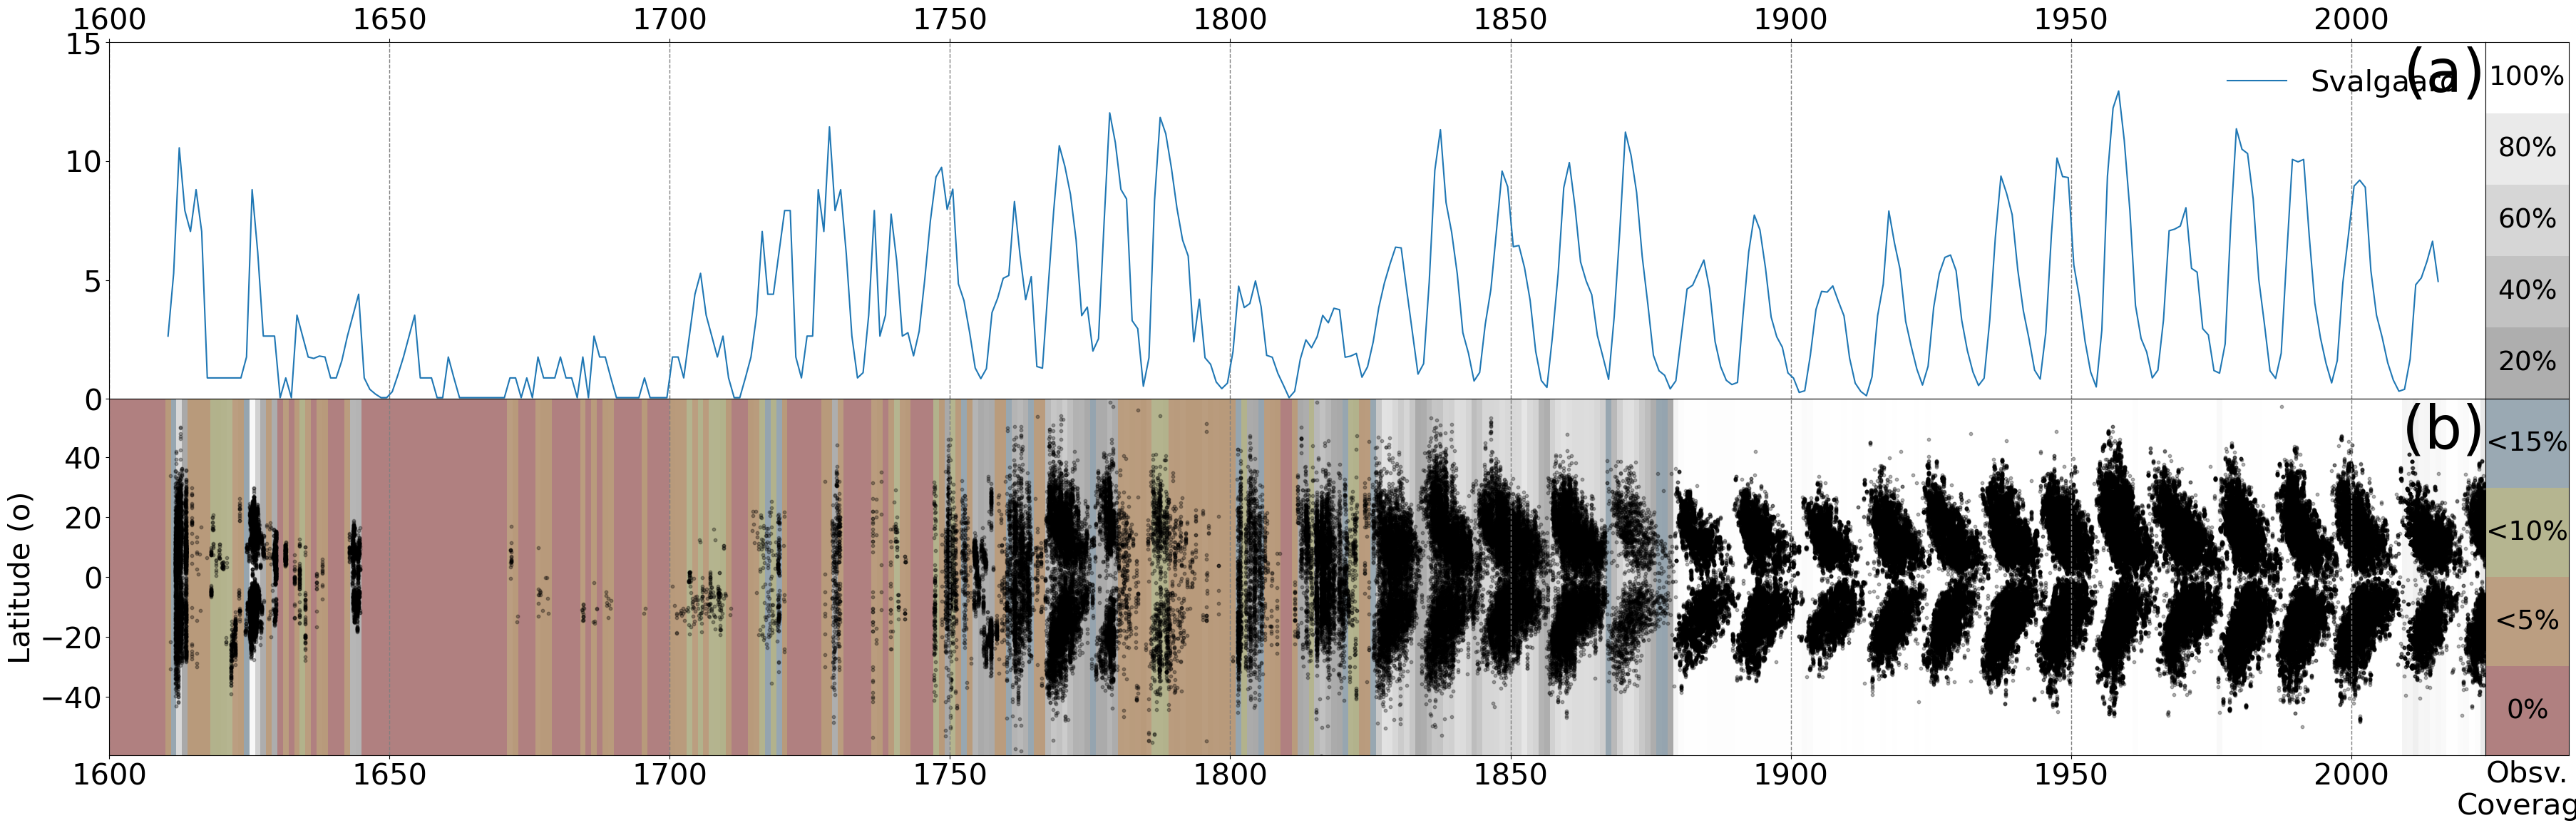

In [44]:
MaskMaxAl = 0.8

# Size definitions
dpi = 300
pxx = 10000  # Horizontal size of each panel
pxy = 1500  # Vertical size of each panel

nph = 1  # Number of horizontal panels
npv = 3  # Number of vertical panels

# Padding
padv = 300  # Vertical padding in pixels
padv2 = 0  # Vertical padding in pixels between panels
padh = 600  # Horizontal padding in pixels at the edge of the figure
padh2 = 350  # Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = npv * pxy + 2 * padv + (npv - 1) * padv2  # Vertical size of figure in pixels
fszh = nph * pxx + 2 * padh + (nph - 1) * padh2  # Horizontal size of figure in pixels

# Conversion to relative unites
ppxx = pxx / fszh
ppxy = pxy / fszv
ppadv = padv / fszv  # Vertical padding in relative units
ppadv2 = padv2 / fszv  # Vertical padding in relative units
ppadh = padh / fszh  # Horizontal padding the edge of the figure in relative units
ppadh2 = padh2 / fszh  # Horizontal padding between panels in relative units


## Start Figure
Y1 = 1600
Y2 = 2024

fig = plt.figure(figsize=(fszh / dpi, fszv / dpi))

plt.rc("font", **font)

ax2 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])

# Plot transparency mask
for i in np.arange(0, BfObsYr.shape[0]):
    if BfObsCv[i] == 0:
        clr = color0
    else:
        clr = colorsMsk[(int(np.min([3, np.floor(BfObsCv[i] / 0.05)])))]
    ax2.fill(
        [BfObsYr[i], BfObsYr[i], BfObsYr[i] + YrCum, BfObsYr[i] + YrCum],
        [-60, 60, 60, -60],
        color=clr,
        alpha=(1 - BfObsCv[i]) * MaskMaxAl,
        zorder=0,
        edgecolor="none",
    )

ax2.scatter(BflyAllDF["FRACYEAR"], BflyAllDF["LATITUDE"], MZ, alpha=0.3, color="k")

ax2.annotate(
    "(b)", xy=(1, 0.99), xycoords="axes fraction", fontsize=60, va="top", ha="right"
)


ax2.set_xlim(left=Y1, right=Y2)
ax2.set_ylim(top=59.5, bottom=-59.5)
ax2.set_ylabel("Latitude (o)")
ax2.grid(color=(0.5, 0.5, 0.5), linestyle="--", linewidth=1, axis="x", which="both")

# ax2.set_xticklabels([])



ax4 = fig.add_axes([ppadh, ppadv + ppxy, ppxx, ppxy])

for observer in GN.keys():
    ax4.plot(GN[observer]['Year'], GN[observer]['GN'], label=observer)

ax4.legend(frameon=False)

ax4.set_xlim(left=Y1, right=Y2)
ax4.set_ylim(top=15, bottom=0)

ax4.xaxis.tick_top()
ax4.xaxis.set_label_position("top")
ax4.grid(color=(0.5, 0.5, 0.5), linestyle="--", linewidth=1, axis="x", which="both")

ax4.annotate(
    "(a)", xy=(1, 0.99), xycoords="axes fraction", fontsize=60, va="top", ha="right"
)

# Add Colorbar
axcb3 = fig.add_axes([ppadh + ppxx, ppadv, ppadh2, ppxy])

axcb3.fill([0, 0, 1, 1], [0, 1, 1, 0], color=color0, alpha=MaskMaxAl, edgecolor="none")
axcb3.annotate(
    "0%",
    xy=(0.5, 0.5),
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=27,
    zorder=3,
)
for i in range(1, 4):
    clr = colorsMsk[i - 1]
    axcb3.fill(
        [0, 0, 1, 1],
        [i, i + 1, i + 1, i],
        color=clr,
        alpha=(1 - i / 20) * MaskMaxAl,
        edgecolor="none",
    )
    axcb3.annotate(
        "<" + str(5 * i) + "%",
        xy=(0.5, i + 0.5),
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=27,
        zorder=3,
    )

axcb3.set_ylim(bottom=0, top=4)
axcb3.set_xlim(left=0, right=1)

axcb3.set_xticks([])
axcb3.set_yticks([])
axcb3.set_xlabel("Obsv.\nCoverage")


# Add Colorbar
axcb2 = fig.add_axes([ppadh + ppxx, ppadv + ppxy, ppadh2, ppxy])
for i in range(1, 6):
    axcb2.fill(
        [0, 0, 1, 1],
        [i, i + 1, i + 1, i],
        color=(0.5, 0.5, 0.5),
        alpha=(1 - i / 5) * MaskMaxAl,
        edgecolor="none",
    )
    axcb2.annotate(
        str(20 * i) + "%",
        xy=(0.5, i + 0.5),
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=27,
        zorder=3,
    )

axcb2.set_ylim(bottom=1, top=6)
axcb2.set_xlim(left=0, right=1)

axcb2.set_xticks([])
axcb2.set_yticks([])

# fig.savefig('F3_Bfly_GN_Coverage.png',dpi=figDPI)